# ***An Exploratory Analysis of Rat Sightings In NYCs 5 Boroughs:***

 Creation of sets for further EDA
Preliminary: *Are the reports of rats equally distributed throughout the boroughs?*

>> Does one borough have more reports of rats per population than the other?
where are the most reports by year, month....

>>

Is there a correlation between the frequency of DSNY collection and the affect on the number of sightings?

Types of collections and the reported sightings.

sightings to frequency
sightings to population



Possible Further exploration into:

>Sightings to vendor

Litter baskets.

>Refuge stats compared to US

>Employment stats and truck violations.


#Reported Sightings
---Original data sourced from:

 https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe


> *additional sources added upon completion of ReadMe.txt master repository creation*


###Initial files joined/cleaned with Tableau Prep

==> step1_ratsightings = (Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv
Rat_Sightings.csv)


==> dsny_frequency = (DSNY_Districts, DSNY_Frequencies, NYC_Community_Board_dist,Modified_Zip_Code_Tabulation_Areas__MODZCTA_.csv)






Neighborhoods to zips

* Bronx Central Bronx 10453, 10457, 10460
* Bronx Park and Fordham 10458, 10467, 10468
* High Bridge and Morrisania 10451, 10452, 10456
* Hunts Point and Mott Haven 10454, 10455, 10459, 10474
* Kingsbridge and Riverdale 10463, 10471
* Northeast Bronx 10466, 10469, 10470, 10475
* Brooklyn Central Brooklyn 11212, 11213, 11216, 11233, 11238
* Southwest Brooklyn 11209, 11214, 11228
* Borough Park 11204, 11218, 11219, 11230
* Canarsie and Flatlands 11234, 11236, 11239
* Southern Brooklyn 11223, 11224, 11229, 11235
* Northwest Brooklyn 11201, 11205, 11215, 11217, 11231
* Flatbush 11203, 11210, 11225, 11226
* East New York and New Lots 11207, 11208
* Greenpoint 11211, 11222
* Sunset Park 11220, 11232
* Bushwick and Williamsburg 11206, 11221, 11237
* Manhattan Central Harlem 10026, 10027, 10030, 10037, 10039
* Chelsea and Clinton 10001, 10011, 10018, 10019, 10020, 10036
* East Harlem 10029, 10035
* Gramercy Park and Murray Hill 10010, 10016, 10017, 10022
* Greenwich Village and Soho 10012, 10013, 10014
* Lower Manhattan 10004, 10005, 10006, 10007, 10038, 10280
* Lower East Side 10002, 10003, 10009
* Upper East Side 10021, 10028, 10044, 10065, 10075, 10128
* Upper West Side 10023, 10024, 10025
* Inwood and Washington Heights 10031, 10032, 10033, 10034, 10040
* Queens Northeast Queens 11361, 11362, 11363, 11364
* North Queens 11354, 11355, 11356, 11357, 11358, 11359, 11360
* Central Queens 11365, 11366, 11367
* Jamaica 11412, 11423, 11432, 11433, 11434, 11435, 11436
* Northwest Queens 11101, 11102, 11103, 11104, 11105, 11106
* West Central Queens 11374, 11375, 11379, 11385
* Rockaways 11691, 11692, 11693, 11694, 11695, 11697
* Southeast Queens 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429
* Southwest Queens 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421
* West Queens 11368, 11369, 11370, 11372, 11373, 11377, 11378
* Staten Island Port Richmond 10302, 10303, 10310
* South Shore 10306, 10307, 10308, 10309, 10312
* Stapleton and St. George 10301, 10304, 10305
* Mid-Island 10314

**series count weekday**
Monday = 0

Tuesday = 1

Wednesday = 2, and so on

#Import

In [1]:
import pandas as pd
!pip install geopandas
import geopandas as gpd
import numpy as np
import re # flexable way to search for matching text in strings Regular Expressions
import seaborn as sns # plotting and graphing, built upon the matplotlib library.
import matplotlib.pyplot as plt
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import geopy #ploting by location longitude and latitude
from math import pi
#from geopy.geocoders import Nominatim as nm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()
# #these populated on their own
# from zmq.constants import THREAD_NAME_PREFIX
# from pandas.core.groupby import groupby

# #additional imports from notebook reference
# import plotly as ply
# import plotly.express as px
# import plotly.io as pio
# import scipy as sc
# import sympy as sy
# import matplotlib as matplot
# import statistics as stat
### some imports are yet to be used...cleaning up and still exploring past analysis usage.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the csv(s)

missing_values=['nan','-', '']
rats = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/step1_ratsightings.csv', na_values = missing_values)
dsny = pd.read_csv('/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/dsny_frequency.csv', na_values = missing_values)
#Unique Key as Index (after import check for duplicates then index unique key after sort of key and created date.)
#drop false leaves the index columns in when reindexing

#EDA DSNY

In [4]:
print('Info:', dsny.info())
print('top 5 rows:', dsny.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   post_code            606 non-null    int64  
 1   modzcta              606 non-null    int64  
 2   label                606 non-null    object 
 3   zcta                 606 non-null    object 
 4   district             606 non-null    object 
 5   districtcode         606 non-null    int64  
 6   section              606 non-null    object 
 7   community_board      606 non-null    object 
 8   council_district     606 non-null    int64  
 9   schedulecode         606 non-null    object 
 10  neighborhoods        606 non-null    object 
 11  nta                  606 non-null    object 
 12  cb_office_address    606 non-null    object 
 13  pop_est              606 non-null    int64  
 14  frequency            606 non-null    object 
 15  bulk_day1            606 non-null    obj

In [5]:
print('Rows, Columns:', dsny.shape)

Rows, Columns: (606, 34)


##Cleaning DSNY

In [6]:
dsny1 = dsny.drop_duplicates()
dsny1.shape == dsny.shape #(80475, 24)  (80481, 24)

True

In [7]:
dsny1.sort_values(by=['schedulecode','modzcta', 'post_code']).head(5)

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
390,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
392,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
284,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
227,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
560,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [8]:
dsny1_sorted = pd.DataFrame(dsny1.sort_values(by=['schedulecode','modzcta', 'post_code'], ascending=True))

In [9]:
dsny1 = dsny1_sorted.reset_index(drop=True)

<Axes: >

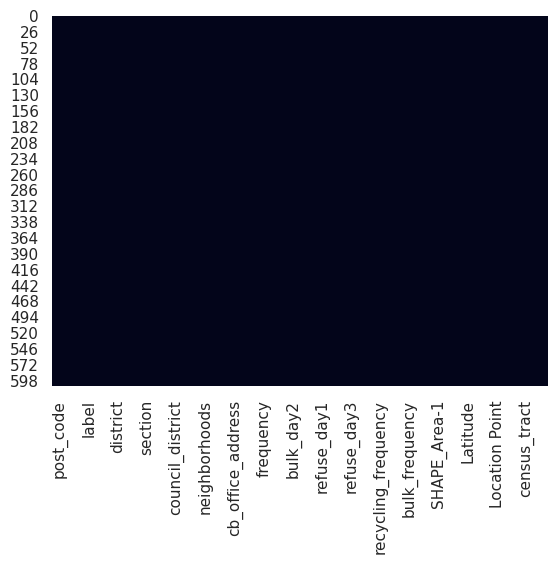

In [10]:
# check missing values in different columns via heatmap
sns.heatmap(dsny1.isnull(), cbar=False)

In [11]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID'],
      dtype='object')

In [12]:
dsny1.head()

,post_code,modzcta,label,zcta,district,districtcode,section,community_board,council_district,schedulecode,...,bulk_frequency,ObjectID,SHAPE_Area-1,SHAPE_Length-1,Latitude,Longitude,Location Point,multipolygon-1,census_tract,GlobalID
0,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011A,...,"Mon, Wed, Fri",1,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
1,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN011,Community Board 1,1,1011B,...,"Tue, Thu, Sat",2,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
2,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013A,...,"Mon, Wed, Fri",3,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
3,10007,10007,10007,"10007, 10278, 10279",MN01,101,MN013,Community Board 1,1,1013B,...,"Tue, Thu, Sat",4,0.000403,0.196156,40.713001,-74.004181,POINT (-74.004181 40.713001),MULTIPOLYGON (((-74.01114498399994 40.72582273...,29,{CAF6E118-57FF-4B3E-A256-99E521BCB12E}
4,10012,10012,10012,10012,MN02,102,MN021,Community Board 2,1,1021A,...,"Mon, Wed, Fri",5,0.000374,0.112141,40.727881,-73.998557,POINT (-73.998557 40.727881),MULTIPOLYGON (((-73.99684138499998 40.73736915...,5501,{9A68C37A-9489-4BCE-8D8C-580117BF1A87}


In [13]:
dsny.bulk_day1.unique()

array(['Wed', 'Tue', 'Thu', 'Unspecified', 'Mon', 'Fri', 'Sat'],
      dtype=object)

In [14]:
# Create the 'location' column using latitude and longitude columns
dsny1['location'] = '(' + dsny1['Latitude'].astype(str) + ', ' + dsny1['Longitude'].astype(str) + ')'


In [15]:
dsny1['location'].unique()

array(['(40.713001, -74.004181)', '(40.727881, -73.998557)',
       '(40.726785, -73.990807)', '(40.753099, -73.997704)',
       '(40.751238, -73.973458)', '(40.789078, -73.976245)',
       '(40.763117, -73.969641)', '(40.815433, -73.957204)',
       '(40.809259, -73.948979)', '(40.800223, -73.942564)',
       '(40.839328, -73.939339)', '(40.819717, -73.913373)',
       '(40.820992, -73.891801)', '(40.833189, -73.897021)',
       '(40.843248, -73.910407)', '(40.857857, -73.909343)',
       '(40.845685, -73.893294)', '(40.874409, -73.885314)',
       '(40.906226, -73.904259)', '(40.823018, -73.856686)',
       '(40.837337, -73.834306)', '(40.847348, -73.855711)',
       '(40.89074, -73.858862)', '(40.718173, -73.944994)',
       '(40.69351, -73.987249)', '(40.680186, -73.94593)',
       '(40.684318, -73.909056)', '(40.67588, -73.871091)',
       '(40.686295, -73.994671)', '(40.650316, -74.008166)',
       '(40.673922, -73.926342)', '(40.667628, -73.95072)',
       '(40.624842, -74.02452

#EDA RATS

In [16]:
print('Info:', rats.info())
print('top 5 rows:', rats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

In [17]:
print('Rows, Columns:', rats.shape)
#80481, 25 without Unique Key as Index Rows, Columns: (208789, 28 ratsightings...no change in names or dropped collumns

Rows, Columns: (210120, 29)


Replacing the double checks(null)s

In [18]:
rats.index.is_unique

True

In [19]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [20]:
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [21]:
#check min max report dates
min_date = min(rats['created_date'])
max_date = max(rats['created_date'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  1/1/2010 11:20:45 AM  -  9/9/2022 9:59:51 AM


In [22]:
 #check min max report dates
# min_date = min(rats['closed_date'])
# max_date = max(rats['closed_date'])
# print('Date range: ', min_date, ' - ', max_date)

cant get index to stay... or is it me? reindex keeping this column that is sorted?

In [23]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210120 entries, 0 to 210119
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   unique_key                  210120 non-null  int64  
 1   created_date                210120 non-null  object 
 2   due_date                    121125 non-null  object 
 3   closed_date                 194098 non-null  object 
 4   location_type               210108 non-null  object 
 5   borough                     210118 non-null  object 
 6   incident_zip                210120 non-null  int64  
 7   community_board             210118 non-null  object 
 8   city                        207123 non-null  object 
 9   incident_address            210120 non-null  object 
 10  street_name                 210119 non-null  object 
 11  cross_street _1             191530 non-null  object 
 12  cross_street_2              191533 non-null  object 
 13  intersection_s

the dates still shows as objects.

In [24]:
rats.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [25]:
#checking the index again no sort going up to reindex nesscisary?
rats.head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,45747140,3/3/2020 6:15:50 AM,NaN,3/3/2020 6:15:50 AM,Commercial Building,BROOKLYN,11207,16 BROOKLYN,BROOKLYN,1746 BROADWAY,...,188102.0,40.682939,-73.910522,"(40.68293851538748, -73.91052156400578)",sightings,11207.0,11207,11207,91972.0,MULTIPOLYGON (((-73.90347629824663 40.67550542...
1,56989476,3/8/2023 2:27:46 AM,NaN,3/8/2023 2:27:46 AM,Construction Site,BROOKLYN,11215,06 BROOKLYN,BROOKLYN,205 14 STREET,...,182243.0,40.666891,-73.990293,"(40.666891259708756, -73.99029264560139)",sightings,11215.0,11215,11215,70156.0,MULTIPOLYGON (((-73.99822639169714 40.67120366...
2,46533529,6/18/2020 8:17:38 PM,NaN,NaN,1-2 Family Dwelling,BROOKLYN,11249,01 BROOKLYN,BROOKLYN,20 SOUTH 4 STREET,...,199125.0,40.713224,-73.967175,"(40.71322419170144, -73.96717477471884)",sightings,NaN,NaN,NaN,NaN,NaN
3,50422420,4/29/2021 5:18:50 PM,NaN,5/3/2021 6:30:22 AM,Other (Explain Below),MANHATTAN,10003,03 MANHATTAN,NEW YORK CITY,336 EAST 6 STREET,...,204137.0,40.726985,-73.987578,"(40.72698493398125, -73.98757795763353)",sightings,10003.0,10003,10003,54682.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...
4,38983405,4/19/2018 12:00:00 AM,05/19/2018 04:59:18 PM,4/19/2018 12:00:00 AM,3+ Family Apt. Building,BROOKLYN,11216,03 BROOKLYN,BROOKLYN,462 NOSTRAND AVENUE,...,188153.0,40.683102,-73.950132,"(40.683102482748794, -73.95013179905419)",sightings,11216.0,11216,11216,56308.0,MULTIPOLYGON (((-73.94773018706293 40.66971511...


In [26]:
rats['incident_zip'].nlargest(n=15)

19435     11697
25640     11697
48480     11697
135054    11697
75003     11695
1312      11694
1485      11694
2118      11694
2267      11694
3920      11694
3956      11694
4757      11694
6754      11694
9910      11694
10003     11694
Name: incident_zip, dtype: int64

##Cleaning Rats

In [27]:
rats.sort_values(by=['incident_zip']).head(5)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
141379,29057903,10/12/2014 12:00:00 AM,11/11/2014 03:29:43 PM,10/15/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK SOUTH,...,218237.0,40.765684,-73.976235,"(40.765684114893894, -73.9762353119456)",sightings,NaN,NaN,NaN,NaN,NaN
12385,34335842,9/16/2016 12:00:00 AM,10/16/2016 12:57:17 PM,10/18/2016 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,LENOX AVENUE,...,229819.0,40.797466,-73.951700,"(40.7974659648698, -73.95170030179558)",sightings,NaN,NaN,NaN,NaN,NaN
133704,37791806,11/27/2017 12:00:00 AM,12/27/2017 06:10:34 PM,12/1/2017 12:00:00 AM,Other (Explain Below),MANHATTAN,83,10 MANHATTAN,CENTRAL PARK,110 LENOX AVENUE,...,229858.0,40.797573,-73.951570,"(40.79757295469069, -73.95157020157765)",sightings,NaN,NaN,NaN,NaN,NaN
32772,40031244,8/17/2018 12:00:00 AM,09/16/2018 12:13:48 AM,8/23/2018 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,221368.0,40.774278,-73.977370,"(40.77427812337319, -73.9773695445951)",sightings,NaN,NaN,NaN,NaN,NaN
140972,28881497,9/15/2014 12:00:00 AM,10/15/2014 05:12:53 PM,10/8/2014 12:00:00 AM,Other (Explain Below),MANHATTAN,83,Unspecified MANHATTAN,CENTRAL PARK,CENTRAL PARK WEST,...,223262.0,40.779476,-73.973573,"(40.7794758468835, -73.97357287287964)",sightings,NaN,NaN,NaN,NaN,NaN


In [28]:
rats_sorted = rats.sort_values(by=['created_date'], ascending=True)

In [29]:
rats_sorted.reset_index(drop=True)

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
0,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
1,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
2,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
3,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
4,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,55348031,9/9/2022 9:38:01 PM,NaN,9/9/2022 9:38:01 PM,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,204305.0,40.727447,-74.002630,"(40.72744669308238, -74.00263018635036)",sightings,10012.0,10012,10012,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...
210116,55351913,9/9/2022 9:39:20 PM,NaN,9/9/2022 9:39:20 PM,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,231932.0,40.803268,-73.958115,"(40.80326808253412, -73.9581147002217)",sightings,10026.0,10026,10026,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...
210117,55348032,9/9/2022 9:45:11 AM,NaN,9/9/2022 9:45:11 AM,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,217724.0,40.764278,-73.992094,"(40.764278242124526, -73.99209424765353)",sightings,10019.0,multiple,"10019, 10020, 10103, 10111, 10112",43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...
210118,55346704,9/9/2022 9:50:04 AM,NaN,9/9/2022 9:50:04 AM,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,204076.0,40.726817,-73.985337,"(40.7268172403236, -73.98533748091528)",sightings,10009.0,10009,10009,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...


In [30]:
print('Borough Value counts after dropping columns and nulls:/n',rats_sorted['borough'].value_counts())

Borough Value counts after dropping columns and nulls:/n BROOKLYN         76566
MANHATTAN        54747
BRONX            39461
QUEENS           31107
STATEN ISLAND     8237
Name: borough, dtype: int64


In [31]:
rats_sorted.loc[~rats_sorted.index.duplicated(), :].head()

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,Y Coordinate (State Plane),latitude,longitude,location,table_count,modztca,label,zcta,pop_est,the_geom
173104,15633054,1/1/2010 11:20:45 AM,01/31/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,208930.0,40.739983,-73.809299,"(40.73998332248969, -73.80929891501533)",sightings,11365.0,11365,11365,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...
38908,15634275,1/1/2010 11:46:51 PM,01/31/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,190346.0,40.689131,-73.981534,"(40.68913109029156, -73.98153436958206)",sightings,11201.0,11201,11201,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...
172919,15633896,1/1/2010 12:11:51 PM,01/31/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,233426.0,40.807367,-73.954388,"(40.807367287308594, -73.95438787024435)",sightings,10027.0,10027,"10027, 10115",64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...
61527,15633897,1/1/2010 12:12:04 PM,01/31/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,250983.0,40.855513,-73.890006,"(40.85551279775197, -73.89000626904053)",sightings,10458.0,10458,10458,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...
175959,15633828,1/1/2010 2:15:27 PM,01/31/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,170864.0,40.635654,-73.967757,"(40.63565426900362, -73.96775698011807)",sightings,11218.0,11218,11218,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...


### Dropping duplicates/ columns/ nulls

In [32]:
rat1 = rats_sorted.drop_duplicates()
rat1.shape == rats_sorted.shape

True

In [33]:
rat1 = pd.DataFrame(rat1.sort_values(['created_date','unique_key'], ascending=True))

In [34]:

#dropping columns that are unneeded or too many null values
# rat1 = rat1.drop(['cities_acceptable_irs', 'irs_estimated_population', 'landmark', 'marg_error'], axis=1)
# check missing values in different columns via heatmap
# sns.heatmap(rat1.isnull(), cbar=False)

In [35]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom'],
      dtype='object')

### replacing values

In [36]:
# Check if values in 'street_name' column are unique
is_unique = rat1['street_name'].is_unique
print("Are the values in 'street_name' column unique? ", is_unique)

# Get value counts of each unique value in 'street_name' column
street_name_counts = rat1['street_name'].value_counts()
print("Value counts of 'street_name' column:")
print(street_name_counts)

Are the values in 'street_name' column unique?  False
Value counts of 'street_name' column:
BROADWAY              1779
EASTERN PARKWAY       1209
GRAND CONCOURSE       1158
BEDFORD AVENUE         919
LAFAYETTE AVENUE       866
                      ... 
ROYAL OAK ROAD           1
WEST SECOND STREET       1
KINGHORN STREET          1
SPRINGFIELD LANE         1
SANDERS PLACE            1
Name: street_name, Length: 8203, dtype: int64


In [37]:
# #when visualizing i noticed west had a double space and n, s, w, e was used along with north, south, east and west
# street_west_counts = rat1[rat1['street_name'].fillna('').str.contains('west', case=False)]['street_name'].value_counts()
# print(street_west_counts)

In [38]:
#dictionary
street_name_replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    'DR MARTIN L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR M L KING JR BOULEVARD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN L KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD',
    'DR MARTIN LUTHER KING JR BLVD': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['street_name'] = rat1['street_name'].replace(street_name_replacements, regex=True)

In [39]:
# rat1['street_name'].unique()

In [40]:
#dictionary
incident_address_replacements = {
    r'\bST\b': 'STREET',
    r'\bAVE\b': 'AVENUE',
    r'\b(BLVD|BLV)\b': 'BOULEVARD',
    r'\bPL\b': 'PLACE',
    r'\bCT\b': 'COURT',
    r'\bDR\b': 'DRIVE',
    r'\bSQ\b': 'SQUARE',
    r'\bTCE\b': 'TERRACE',
    r'\bAVE\b': 'AVENUE',
    r'\bE\b': 'EAST',
    r'\bW\b': 'WEST',
    r'\bN\b': 'NORTH',
    r'\bS\b': 'SOUTH',
    r'\bDR MARTIN L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR M L KING JR BOULEVARD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN L KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD',
    r'\bDR MARTIN LUTHER KING JR BLVD\b': 'DR MARTIN LUTHER KING JR BOULEVARD'
}

# Apply the replacement rules
rat1['incident_address'] = rat1['incident_address'].replace(incident_address_replacements, regex=True)

In [41]:
# # double check if values are unique
# is_unique = rat1['incident_address'].is_unique
# print("Are the values in 'incident_address' column unique? ", is_unique)

# # Get value counts of each unique value
# value_counts = rat1['incident_address'].value_counts()
# print("Value counts of 'incident_address' column:")
# print(value_counts)

In [42]:
#Remove extra spaces
rat1['incident_address'] = rat1['incident_address'].apply(lambda x: "".join([x[i] for i in range(len(x)) if i == 0 or (x[i] != " " or x[i-1] != " ")]))

In [43]:
address_counts = rat1['incident_address'].fillna('').value_counts()
print(address_counts)

2131 WALLACE AVENUE     317
95 EASTERN PARKWAY      256
651 BROOKLYN AVENUE     177
410 EASTERN PARKWAY     150
2486 DAVIDSON AVENUE    138
                       ... 
157 EAST 99 STREET        1
22 CRITTENDEN PLACE       1
29 ABERDEEN STREET        1
399 BLEEKER STREET        1
725 TENTH AVENUE          1
Name: incident_address, Length: 96866, dtype: int64


In [44]:
# Convert "incident_zip" to string type
rat1['incident_zips'] = rat1['incident_zip'].astype(str)

# Create a new column combining "incident_address" and "incident_zip"
rat1['address_zip'] = rat1['incident_address'] + ', ' + rat1['incident_zips']

###New Columns

####pd.datetime/ created YQMWD

In [45]:
#Converting the date column to its specified data type
rat1['created_date'] = pd.to_datetime(rat1['created_date'])
rat1['closed_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce')

In [46]:
# Creating 4 new columns for easy querying
rat1['year']= rat1.created_date.dt.year
rat1['quarter']= rat1.created_date.dt.quarter
rat1['month'] = rat1.created_date.dt.month
rat1['weekday'] = rat1.created_date.dt.weekday
rat1['day'] = rat1.created_date.dt.day
rat1['hour'] = rat1.created_date.dt.hour
rat1

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,pop_est,the_geom,incident_zips,address_zip,year,quarter,month,weekday,day,hour
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,44983.0,MULTIPOLYGON (((-73.81088698294997 40.72717335...,11365,"59-13 159 STREET, 11365",2010,1,1,4,1,11
38908,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,62823.0,MULTIPOLYGON (((-73.98999099359916 40.68331867...,11201,"532 FULTON STREET, 11201",2010,1,1,4,1,23
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,64548.0,MULTIPOLYGON (((-73.96581272236776 40.80884237...,10027,"317 WEST 120 STREET, 10027",2010,1,1,4,1,12
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,83960.0,MULTIPOLYGON (((-73.8999587931763 40.857423896...,10458,"2356 LORILLARD PLACE, 10458",2010,1,1,4,1,12
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,74508.0,MULTIPOLYGON (((-73.97716602560648 40.63074880...,11218,"900 CONEY ISLAND AVENUE, 11218",2010,1,1,4,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165233,55348031,2022-09-09 21:38:01,NaN,2022-09-09 21:38:01,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,23411.0,MULTIPOLYGON (((-74.00408405811187 40.72537431...,10012,"54 MACDOUGAL STREET, 10012",2022,3,9,4,9,21
64373,55351913,2022-09-09 21:39:20,NaN,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,39363.0,MULTIPOLYGON (((-73.96200720826798 40.80550908...,10026,"312 MANHATTAN AVENUE, 10026",2022,3,9,4,9,21
125775,55348032,2022-09-09 09:45:11,NaN,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,43703.0,MULTIPOLYGON (((-74.00114791977168 40.76202777...,10019,"725 TENTH AVENUE, 10019",2022,3,9,4,9,9
93980,55346704,2022-09-09 09:50:04,NaN,2022-09-09 09:50:04,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,57925.0,MULTIPOLYGON (((-73.98863576728334 40.72293099...,10009,"93 1/2 EAST 7 STREET, 10009",2022,3,9,4,9,9


In [47]:
rat1['sightings_count'] = 1

In [48]:
rat1['sightings_count'].unique()

array([1])

In [49]:
rat1['unique_key'].isnull().sum()

0

In [50]:
population = rat1['pop_est']
sightings_count = rat1['sightings_count']

sightings_per_capita = np.where(population != 0, sightings_count / population, 0)

# Add the 'sightings_per_capita' column to the DataFrame
rat1['sightings_per_capita'] = sightings_per_capita

####DATEDIF = NEW COLUMN DURATION

In [51]:

#Converting the date column to its specified data type
rat1['create_date'] = pd.to_datetime(rat1['created_date'], errors='coerce').dt.date
rat1['close_date'] = pd.to_datetime(rat1['closed_date'], errors='coerce').dt.date

In [52]:

# Calculate the duration between 'create_date' and 'close_date' and assign it to 'duration' column
rat1['duration'] = rat1['close_date'] - rat1['create_date']

# Replace NaT values in 'duration' column with zeros
rat1['duration'] = rat1['duration'].fillna(pd.Timedelta(0))

# Convert duration from timedelta to integer (number of days)
rat1['duration'] = rat1['duration'].dt.days

# Display the updated DataFrame
print(rat1.head(2))

        unique_key        created_date                due_date closed_date  \
173104    15633054 2010-01-01 11:20:45  01/31/2010 11:20:45 AM         NaT   
38908     15634275 2010-01-01 23:46:51  01/31/2010 11:46:51 PM         NaT   

              location_type   borough  incident_zip community_board  \
173104  1-2 Family Dwelling    QUEENS         11365       07 QUEENS   
38908   Commercial Building  BROOKLYN         11201     02 BROOKLYN   

                 city   incident_address  ... quarter month weekday day hour  \
173104  FRESH MEADOWS   59-13 159 STREET  ...       1     1       4   1   11   
38908        BROOKLYN  532 FULTON STREET  ...       1     1       4   1   23   

       sightings_count sightings_per_capita create_date  close_date  duration  
173104               1             0.000022  2010-01-01         NaT         0  
38908                1             0.000016  2010-01-01         NaT         0  

[2 rows x 42 columns]


In [53]:
found_values = rat1[rat1['closed_date'] == '1899-12-31 19:00:00']
print(found_values)

        unique_key        created_date due_date         closed_date  \
3112      51936751 2021-09-21 10:04:02      NaN 1899-12-31 19:00:00   
126931    51936175 2021-09-21 09:25:55      NaN 1899-12-31 19:00:00   

                location_type borough  incident_zip community_board city  \
3112    Other (Explain Below)   BRONX         10459        02 BRONX  NaN   
126931    1-2 Family Dwelling  QUEENS         11377       01 QUEENS  NaN   

       incident_address  ... quarter month weekday day hour sightings_count  \
3112    EAST 165 STREET  ...       3     9       1  21   10               1   
126931        28 AVENUE  ...       3     9       1  21    9               1   

       sightings_per_capita create_date  close_date  duration  
3112               0.000021  2021-09-21  1899-12-31    -44459  
126931             0.000012  2021-09-21  1899-12-31    -44459  

[2 rows x 42 columns]


In [54]:
rat1['duration'].unique()

array([     0,      9,     44,    156,      5,     11,    157,     23,
            3,      7,      2,     12,     14,      1,      8,     19,
           34,      6,     10,     54,      4,     17,     21,     25,
           38,     15,     24,     16,     13,     18,     46,     40,
           68,    142,     29,     94,     28,     61,     67,     48,
           27,     20,     -2,     42,     66,     41,     62,     31,
          143,     32,     45,     36,     30,     35,     56,     33,
           47,     -5,     26,     75,     22,     57,     -6,     64,
           43,     93,     60,     58,     63,     73,     65,     49,
          -30,     51,     -4,     87,     59,     92,    140,    170,
       -41286,    130,     39,     50,    147,     71,    138,    131,
           80,    137,     89,     52,     55,    -11,     70,     86,
          163,     37,     79,    135,     78,     74,     69,     72,
          102,    123,    117,     98,    109,     -8,     53,     -9,
      

In [55]:
rat1['frequency_cb'] = rat1['address_zip'].map(rat1['address_zip'].value_counts()).fillna(0)
print(rat1.frequency_cb.unique())

[  1   2   3   4   5   9  33  19  12  31   6  13   7  15   8  21 177  60
  29  16  38  10 150  39  23  11  41  14 256  59  28  50  22  17  24  30
  35  20  75  36  45  83  61  25  32  44  34  40  77  76  43 120  81  26
  53  18  49  80 317  42  47  84 117  57  46  27  98  73 110  37  89  67
 114  56  99  54  78 137  65  85  51  52 138]


###Dropping final nulls for analysis

In [56]:
rat1.isnull().sum()

unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
table_count                        0
modztca                         1079
label                           1079
zcta                            1079
p

In [57]:
# drop duplicate data (== gives the boolean value)
rat2 = rat1.drop_duplicates()
rat2.shape == rat1.shape

True

#VALUES

####DATE RANGE:

In [58]:
#check min max crash dates
min_date = min(rat1['created_date'])
max_date = max(rat1['created_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  2010-01-01 08:29:58  -  2023-07-03 02:05:32


In [59]:
# Replace '0000-00-00 00:00:00' with NaT (Not-a-Time)
rat1['close_date'] = rat1['closed_date'].replace('0000-00-00 00:00:00', pd.NaT)

# Convert 'closed_date' to datetime type
rat1['close_date'] = pd.to_datetime(rat1['close_date'], errors='coerce')

# Calculate the minimum and maximum values for 'closed_date'
close_dates_min = rat1['close_date'].min()
close_dates_max = rat1['close_date'].max()

# Print the calculated values
print(f"Close Date Range: {close_dates_min} - {close_dates_max}")

Close Date Range: 1899-12-31 19:00:00 - 2023-06-30 15:11:33


In [60]:
#check min max crash dates
min_date = min(rat1['closed_date'])
max_date = max(rat1['closed_date'])
print(f'Date range:  {min_date}  -  {max_date}')

Date range:  NaT  -  NaT


####rat1    

In [61]:
rat1.columns

Index(['unique_key', 'created_date', 'due_date', 'closed_date',
       'location_type', 'borough', 'incident_zip', 'community_board', 'city',
       'incident_address', 'street_name', 'cross_street _1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'address_Type',
       'landmark', 'status', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location',
       'table_count', 'modztca', 'label', 'zcta', 'pop_est', 'the_geom',
       'incident_zips', 'address_zip', 'year', 'quarter', 'month', 'weekday',
       'day', 'hour', 'sightings_count', 'sightings_per_capita', 'create_date',
       'close_date', 'duration', 'frequency_cb'],
      dtype='object')

In [62]:
rat1['create_date']

173104    2010-01-01
38908     2010-01-01
172919    2010-01-01
61527     2010-01-01
175959    2010-01-01
             ...    
165233    2022-09-09
64373     2022-09-09
125775    2022-09-09
93980     2022-09-09
184248    2022-09-09
Name: create_date, Length: 210120, dtype: object

In [63]:
# Convert 'close_date' to datetime type
rat1['close_date'] = pd.to_datetime(rat1['close_date'])

# Calculate the minimum and maximum values for 'close_date'
close_dates_min = rat1['close_date'].min()
close_dates_max = rat1['close_date'].max()

# Print the calculated values
print(f"Close Date Range: {close_dates_min} - {close_dates_max}")

Close Date Range: 1899-12-31 19:00:00 - 2023-06-30 15:11:33


In [64]:
rat1

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,month,weekday,day,hour,sightings_count,sightings_per_capita,create_date,close_date,duration,frequency_cb
173104,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,1,4,1,11,1,0.000022,2010-01-01,NaT,0,1
38908,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,1,4,1,23,1,0.000016,2010-01-01,NaT,0,1
172919,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,1,4,1,12,1,0.000015,2010-01-01,NaT,0,2
61527,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,1,4,1,12,1,0.000012,2010-01-01,NaT,0,3
175959,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,1,4,1,14,1,0.000013,2010-01-01,NaT,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165233,55348031,2022-09-09 21:38:01,NaN,2022-09-09 21:38:01,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,9,4,9,21,1,0.000043,2022-09-09,2022-09-09 21:38:01,0,15
64373,55351913,2022-09-09 21:39:20,NaN,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,9,4,9,21,1,0.000025,2022-09-09,2022-09-09 21:39:20,0,5
125775,55348032,2022-09-09 09:45:11,NaN,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,9,4,9,9,1,0.000023,2022-09-09,2022-09-09 09:45:11,0,1
93980,55346704,2022-09-09 09:50:04,NaN,2022-09-09 09:50:04,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,9,4,9,9,1,0.000017,2022-09-09,2022-09-09 09:50:04,0,7


In [65]:
print('Info:', rat1.info())
print('top 5 rows:', rat1.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210120 entries, 173104 to 184248
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   unique_key                  210120 non-null  int64         
 1   created_date                210120 non-null  datetime64[ns]
 2   due_date                    121125 non-null  object        
 3   closed_date                 194098 non-null  datetime64[ns]
 4   location_type               210108 non-null  object        
 5   borough                     210118 non-null  object        
 6   incident_zip                210120 non-null  int64         
 7   community_board             210118 non-null  object        
 8   city                        207123 non-null  object        
 9   incident_address            210120 non-null  object        
 10  street_name                 210119 non-null  object        
 11  cross_street _1             191530

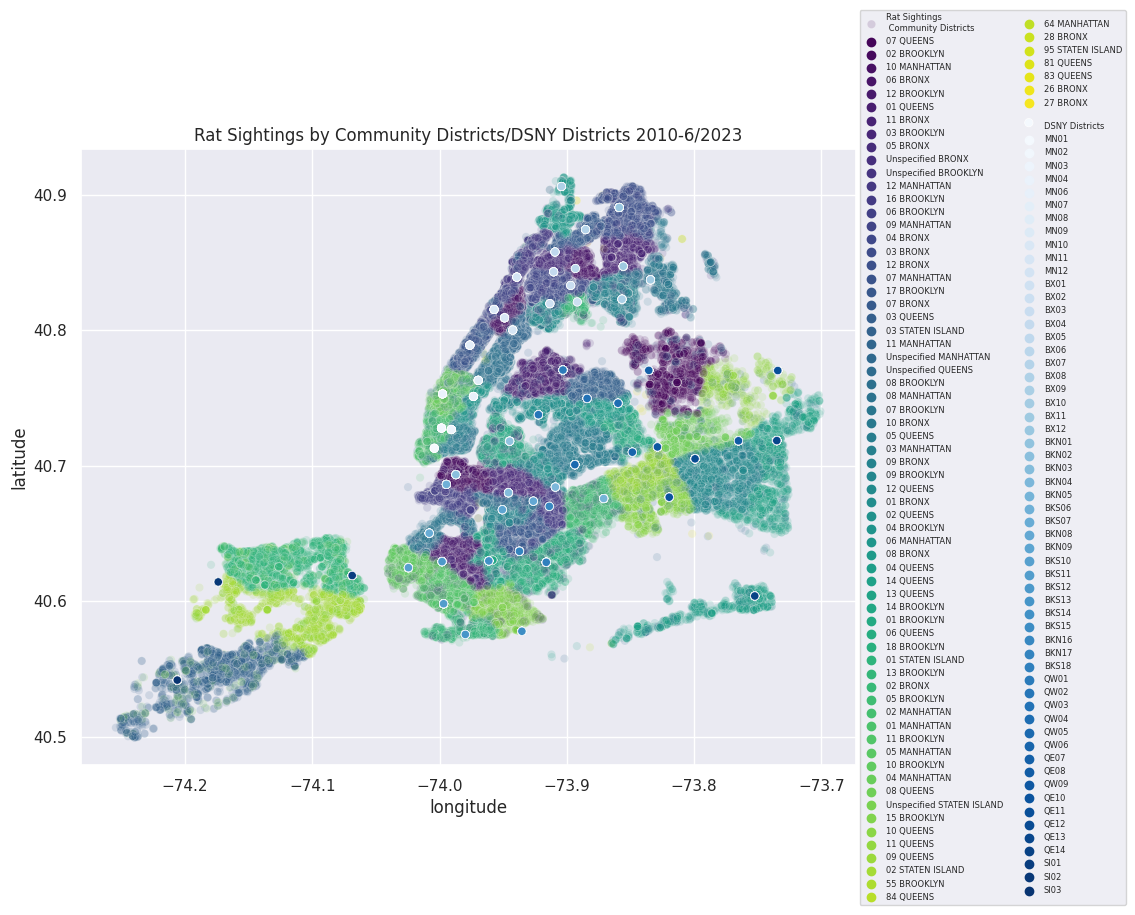

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=rat1, x='longitude', y='latitude', hue='community_board', alpha=0.15, palette="viridis", label='Rat Sightings\n Community Districts', ax=ax)
sns.scatterplot(data=dsny1, x='Longitude', y='Latitude', hue= 'district', palette="Blues" ,label='\nDSNY Districts', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=6, ncol=2)
ax.set_title('Rat Sightings by Community Districts/DSNY Districts 2010-6/2023')
plt.show()

####Top ADDRESS_ZIP incidents =  rat1.groupby(['XXX'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

Top Incidents Broken down by Created Date, Year, Quarter,

In [67]:
# Top addresses ZIP codes by created date
top_addresses_by_created_date = rat1.groupby(['created_date'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by year
top_addresses_by_year = rat1.groupby(['year'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by quarter
top_addresses_by_quarter = rat1.groupby(['quarter'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by month
top_addresses_by_month = rat1.groupby(['month'])['address_zip'].apply(lambda x: x.value_counts().nlargest())
# Top addresses ZIP codes by weekday
top_addresses_by_weekday = rat1.groupby(['weekday'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by day of the week
top_addresses_by_day_of_week = rat1.groupby(['day'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Top addresses ZIP codes by hour
top_addresses_by_hour = rat1.groupby(['hour'])['address_zip'].apply(lambda x: x.value_counts().nlargest())

# Display the results
print("Top addresses ZIP code by created date:")
print(top_addresses_by_created_date)
print()

print("Top addresses ZIP code by year:")
print(top_addresses_by_year)
print()

print("Top addresses ZIP code by quarter:")
print(top_addresses_by_quarter)
print()

print("Top addresses ZIP code by month:")
print(top_addresses_by_month)
print()

print("Top addresses ZIP code by weekday:")
print(top_addresses_by_weekday)
print()

print("Top addresses ZIP code by day of the week:")
print(top_addresses_by_day_of_week)
print()

print("Top addresses ZIP code by hour:")
print(top_addresses_by_hour)
print()

Top addresses ZIP code by created date:
created_date                                       
2010-01-01 08:29:58  202 PULASKI STREET, 11206         1
2010-01-01 11:20:45  59-13 159 STREET, 11365           1
2010-01-01 12:11:51  317 WEST 120 STREET, 10027        1
2010-01-01 12:12:04  2356 LORILLARD PLACE, 10458       1
2010-01-01 14:15:27  900 CONEY ISLAND AVENUE, 11218    1
                                                      ..
2023-07-02 23:04:44  134 MONTAGUE STREET, 11201        1
2023-07-02 23:27:12  34-20 32 STREET, 11106            1
2023-07-03 00:19:54  3 WEST 137 STREET, 10037          1
2023-07-03 01:08:50  PARK ROW, 10038                   1
2023-07-03 02:05:32  EAST 73 STREET, 10021             1
Name: address_zip, Length: 116542, dtype: int64

Top addresses ZIP code by year:
year                                  
2010  600 WEST 196 STREET, 10040          28
      EAST 93 STREET, 10128               23
      2980 WEST 28 STREET, 11224          18
      2970 WEST 27 STREET,

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 [Text(-10.0, 0, '(2022, 41-49 150 STREET, 11355)'),
  Text(0.0, 0, '(2010, 600 WEST 196 STREET, 10040)'),
  Text(10.0, 0, '(2012, 46-01 67 STREET, 11377)'),
  Text(20.0, 0, '(2014, 2131 WALLACE AVENUE, 10462)'),
  Text(30.0, 0, '(2016, 95 EASTERN PARKWAY, 11238)'),
  Text(40.0, 0, '(2018, 410 EASTERN PARKWAY, 11225)'),
  Text(50.0, 0, '(2020, 76 STREET NICHOLAS PLACE, 10032)'),
  Text(60.0, 0, '(2022, 41-49 150 STREET, 11355)'),
  Text(70.0, 0, ''),
  Text(80.0, 0, '')])

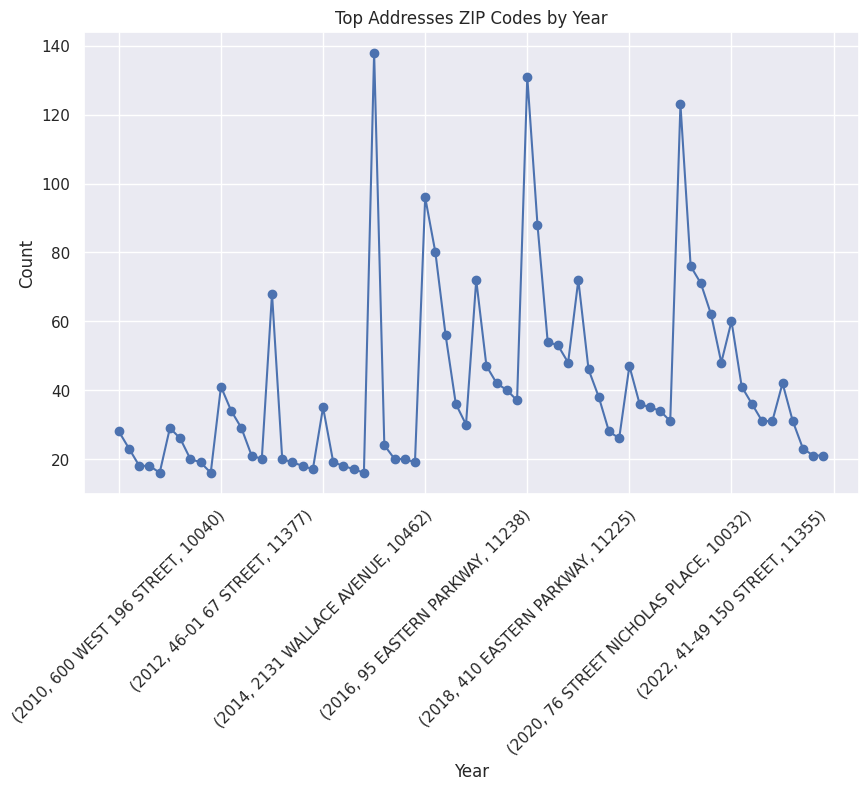

In [68]:
plt.figure(figsize=(10, 6))
top_addresses_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Top Addresses ZIP Codes by Year')
plt.xticks(rotation=45)

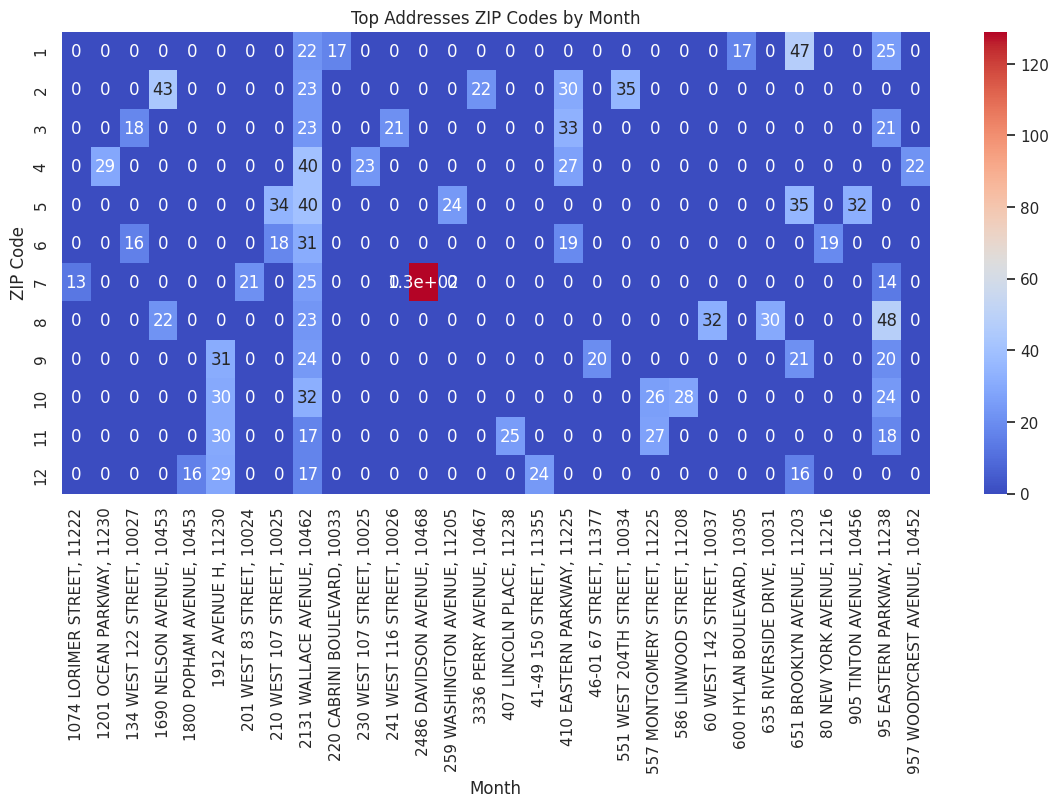

In [69]:
plt.figure(figsize=(14, 6))
sns.heatmap(top_addresses_by_month.unstack().fillna(0), cmap='coolwarm', annot=True)
plt.xlabel('Month')
plt.ylabel('ZIP Code')
plt.title('Top Addresses ZIP Codes by Month')
plt.xticks(rotation=90)
plt.show()

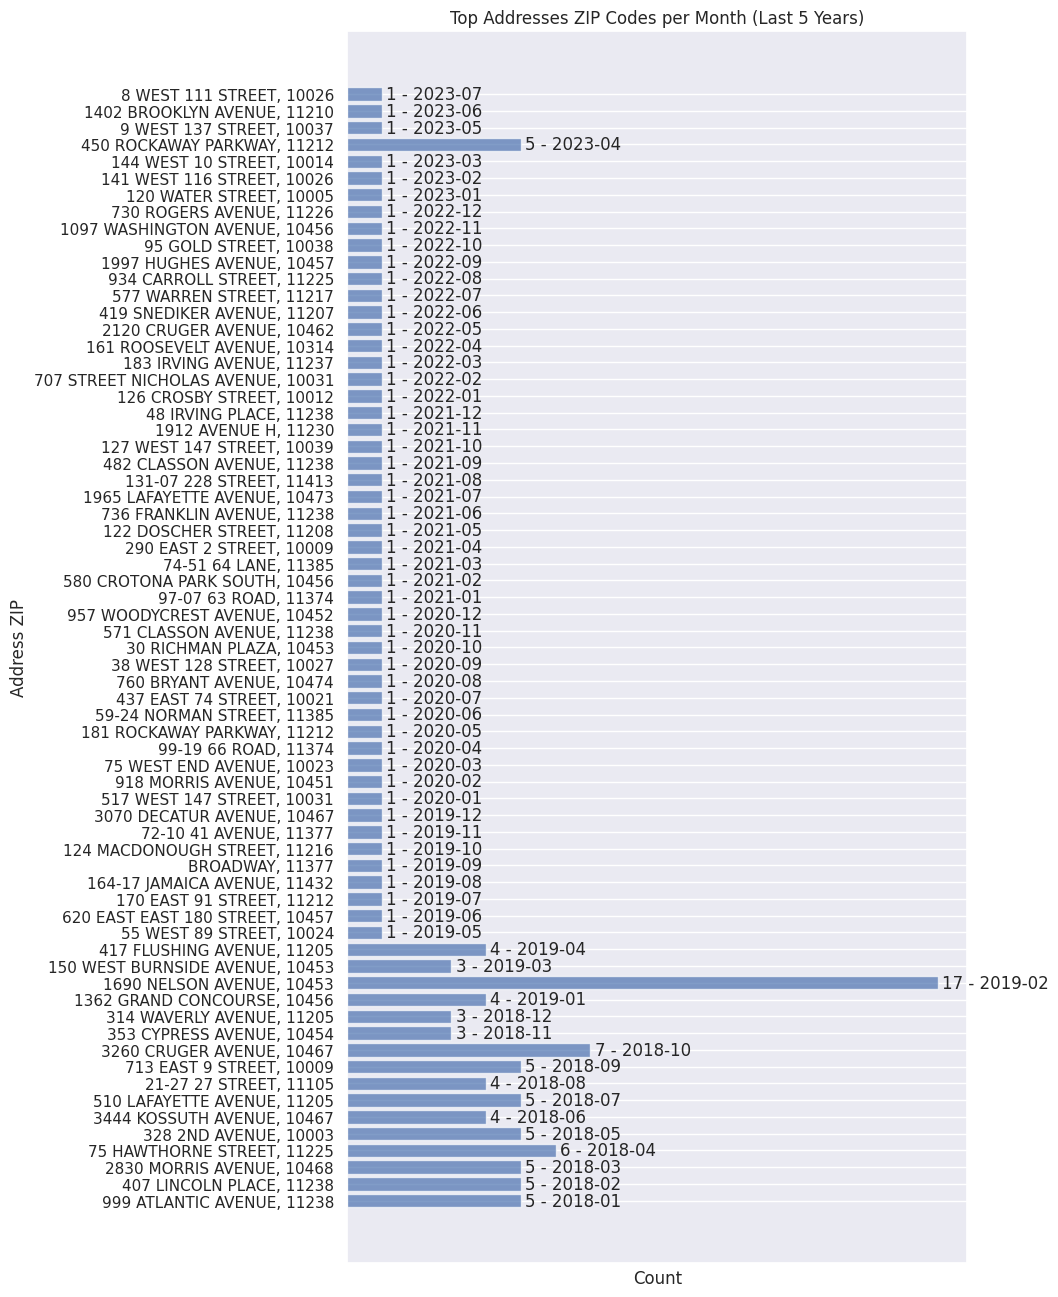

In [70]:
# Convert the series to a DataFrame
df_top_addresses = pd.DataFrame(top_addresses_by_created_date)

# Reset the index of the DataFrame
df_top_addresses.reset_index(inplace=True)

# Rename the columns
df_top_addresses.columns = ['created_date', 'address_zip', 'count']

# Convert the 'created_date' column to a period type representing month and year
df_top_addresses['created_date'] = pd.to_datetime(df_top_addresses['created_date'])
df_top_addresses['month_year'] = df_top_addresses['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year = pd.to_datetime('today').year
five_years_ago = current_year - 5
df_top_addresses = df_top_addresses[df_top_addresses['created_date'].dt.year >= five_years_ago]

# Get the top 3 ZIP codes per month
top_3_per_month = df_top_addresses.groupby('month_year').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

# Create a figure and axes with a wider plot
fig, ax = plt.subplots(figsize=(8, 16))

# Plot the data
bars = ax.barh(top_3_per_month['address_zip'], top_3_per_month['count'], alpha=0.7)

# Set the labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Address ZIP')
ax.set_title('Top Addresses ZIP Codes per Month (Last 5 Years)')

# Add labels to the bars indicating the count and month-year
for bar, month_year in zip(bars, top_3_per_month['month_year'].astype(str)):
    width = bar.get_width()
    ax.annotate(f'{int(width)} - {month_year}', xy=(width, bar.get_y() + bar.get_height() / 2), xytext=(3, 0),
                textcoords="offset points", ha='left', va='center')

# Remove x-axis ticks since count is already shown in the labels
ax.xaxis.set_ticks([])

# Display the plot
plt.show()

####Top Community Board = rat1.groupby(['XXX', 'community_board']).size().reset_index(name='cb_count')

#####Top Community board by created date

In [71]:
# Top  Community Boards by Created Date'
top_community_board_counts = rat1.groupby(['created_date', 'community_board']).size().reset_index(name='cb_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_community_board_sorted = top_community_board_counts.sort_values(by=['created_date', 'cb_count'], ascending=[False, False])

print("Top Addresses by Sightings Created Date:")
print(top_community_board_sorted)

Top Addresses by Sightings Created Date:
              created_date        community_board  cb_count
167724 2023-07-03 02:05:32  Unspecified MANHATTAN         1
167723 2023-07-03 01:08:50           01 MANHATTAN         1
167722 2023-07-03 00:19:54           10 MANHATTAN         1
167721 2023-07-02 23:27:12              01 QUEENS         1
167720 2023-07-02 23:04:44            02 BROOKLYN         1
...                    ...                    ...       ...
4      2010-01-01 14:15:27            12 BROOKLYN         1
3      2010-01-01 12:12:04               06 BRONX         1
2      2010-01-01 12:11:51           10 MANHATTAN         1
1      2010-01-01 11:20:45              07 QUEENS         1
0      2010-01-01 08:29:58            03 BROOKLYN         1

[167725 rows x 3 columns]


In [72]:
# Filter the 'cd_count' values that are >= 5
top_cb_greaterthan5 = top_community_board_sorted[top_community_board_sorted['cb_count'] >= 5]

print("Top Addresses by Sightings Created Date (Counts >= 5):")
print(top_cb_greaterthan5)

Top Addresses by Sightings Created Date (Counts >= 5):
              created_date        community_board  cb_count
160712 2023-04-03 11:40:47            17 BROOKLYN         5
74621  2019-04-16 00:00:00            09 BROOKLYN         5
74627  2019-04-16 00:00:00      Unspecified BRONX         5
74542  2019-04-14 00:00:00   Unspecified BROOKLYN         9
74516  2019-04-13 00:00:00  Unspecified MANHATTAN         5
...                    ...                    ...       ...
4511   2010-07-08 00:00:00           08 MANHATTAN         8
4523   2010-07-08 00:00:00   Unspecified BROOKLYN         6
4494   2010-07-07 00:00:00   Unspecified BROOKLYN        11
4466   2010-07-06 00:00:00   Unspecified BROOKLYN         5
4405   2010-07-02 00:00:00      Unspecified BRONX         5

[2176 rows x 3 columns]


In [73]:
# Filter the data for cb_count >= 5
df_filtered_counts = top_community_board_sorted[top_community_board_sorted['cb_count'] >= 5]

# Get the unique cb_count values along with the community_board column
filtered_counts = df_filtered_counts[['community_board', 'cb_count']].drop_duplicates()

print("Top Community Boards by Sightings Created Date (Counts >= 5):")
print(filtered_counts)

# Convert the 'created_date' column to a period type representing month and year
top_community_board_sorted['created_date'] = pd.to_datetime(top_community_board_sorted['created_date'])
top_community_board_sorted['month_year'] = top_community_board_sorted['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year_cb = pd.to_datetime('today').year
five_years_ago_cb = current_year_cb - 5
top_community_board_sorted_filtered = top_community_board_sorted[top_community_board_sorted['created_date'].dt.year >= five_years_ago_cb]

# Filter the data for cb_count >= 5
df_filtered_counts_filtered = top_community_board_sorted_filtered[top_community_board_sorted_filtered['cb_count'] >= 5]

# Get the unique cb_count values along with the community_board column
filtered_counts_filtered = df_filtered_counts_filtered[['community_board', 'cb_count']].drop_duplicates()

print("Top Community Boards by Sightings Created Date (Counts >= 5, Last 5 Years):")
print(filtered_counts_filtered)

Top Community Boards by Sightings Created Date (Counts >= 5):
              community_board  cb_count
160712            17 BROOKLYN         5
74621             09 BROOKLYN         5
74627       Unspecified BRONX         5
74542    Unspecified BROOKLYN         9
74516   Unspecified MANHATTAN         5
...                       ...       ...
9977         03 STATEN ISLAND         6
8660              11 BROOKLYN         5
5625             08 MANHATTAN         7
5383                02 QUEENS         5
4511             08 MANHATTAN         8

[209 rows x 2 columns]
Top Community Boards by Sightings Created Date (Counts >= 5, Last 5 Years):
              community_board  cb_count
160712            17 BROOKLYN         5
74621             09 BROOKLYN         5
74627       Unspecified BRONX         5
74542    Unspecified BROOKLYN         9
74516   Unspecified MANHATTAN         5
...                       ...       ...
63763                07 BRONX         5
63316               03 QUEENS         

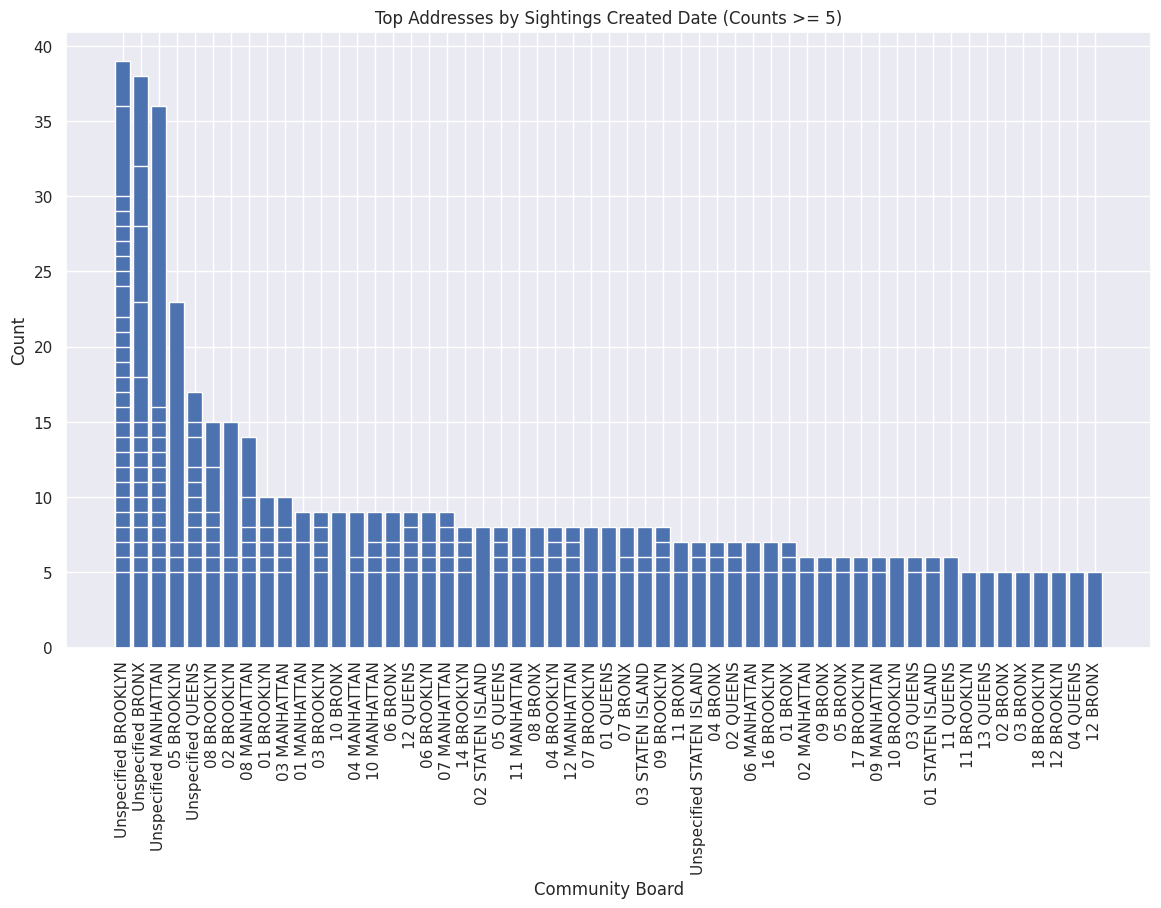

In [74]:
# Sort the data by 'cb_count' in descending order
filtered_counts_sorted = filtered_counts.sort_values('cb_count', ascending=False)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data as a bar chart
ax.bar(filtered_counts_sorted['community_board'], filtered_counts_sorted['cb_count'])

# Set the labels and title
ax.set_xlabel('Community Board')
ax.set_ylabel('Count')
ax.set_title('Top Addresses by Sightings Created Date (Counts >= 5)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

#####Top Community board YQMweekday

In [75]:

# # Top Community Boards by year','quarter','month','weekday'
# top_cb_yqmw = rat1.groupby(['year','quarter','month','weekday', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# print("Top Community Boards by year','quarter','month','weekday':")
# print(top_cb_yqmw)
# print()

#####Top Community board YQM

In [76]:

# # Top  Community Boards by year','quarter','month'
# top_cb_yqm = rat1.groupby(['year','quarter','month', 'community_board'])['unique_key'].apply(lambda x: x.value_counts().idxmax())

# print("Top  Community Boards by year...:")
# print(top_cb_yqm)
# print()

#####Top Community board YQ

In [77]:

# Top  Community Boards by year','quarter'
top_cb_yq_counts = rat1.groupby(['year','quarter', 'community_board']).size().reset_index(name='yq_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_cb_yq_sorted = top_cb_yq_counts.sort_values(by=['year','quarter', 'yq_count'], ascending=[True,True, False])

print("Top  Community Boards by year and quarter:")
print(top_cb_yq_sorted)

Top  Community Boards by year and quarter:
      year  quarter       community_board  yq_count
29    2010        1          07 MANHATTAN        87
37    2010        1          09 MANHATTAN        71
11    2010        1           03 BROOKLYN        62
27    2010        1              07 BRONX        57
15    2010        1              04 BRONX        55
...    ...      ...                   ...       ...
3509  2023        3           12 BROOKLYN         1
3511  2023        3             12 QUEENS         1
3512  2023        3             13 QUEENS         1
3516  2023        3           18 BROOKLYN         1
3517  2023        3  Unspecified BROOKLYN         1

[3519 rows x 4 columns]


#####Top Community board Y

In [78]:

# Compute the count of sightings by 'year' and 'community_board'
top_cb_y_counts = rat1.groupby(['year', 'community_board']).size().reset_index(name='y_count')

# Sort the data by 'year' in ascending order and 'count' in descending order
top_cb_y_sorted = top_cb_y_counts.sort_values(by=['year', 'y_count'], ascending=[True, False])

print("Top incident address by year and community board:")
print(top_cb_y_sorted)

Top incident address by year and community board:
     year        community_board  y_count
60   2010   Unspecified BROOKLYN      567
29   2010           07 MANHATTAN      364
11   2010            03 BROOKLYN      335
61   2010  Unspecified MANHATTAN      326
59   2010      Unspecified BRONX      321
..    ...                    ...      ...
921  2023     Unspecified QUEENS        6
918  2023      Unspecified BRONX        4
915  2023               26 BRONX        1
916  2023           64 MANHATTAN        1
917  2023              81 QUEENS        1

[922 rows x 3 columns]


####Top Incidents by  New Columns = CB_address_zip = community board + address + zip AND CB_counts = rat1.groupby(['created_date', 'CB_address_zip'])['unique_key'].transform('count')

#####Year, created date

In [79]:
# Create a new column combining 'community_board', 'incident_address', and 'incident_zip'
rat1['CB_address_zip'] = rat1['community_board'] + ', ' + rat1['incident_address'] + ', ' + rat1['incident_zips']

rat1['CB_counts'] = rat1.groupby(['created_date', 'CB_address_zip'])['unique_key'].transform('count')

# Filter the data for the last 5 years
current_year_cb = pd.to_datetime('today').year
five_years_ago_cb = current_year_cb - 5
rat1_last5yrs = rat1[rat1['created_date'].dt.year >= five_years_ago_cb]

# Get the sum of the counts CB_address_zip column
last5yrs_filtered_counts = rat1_last5yrs.groupby('CB_address_zip').agg({'CB_counts': 'sum'}).reset_index()
top_5_address_counts = last5yrs_filtered_counts.nlargest(5, 'CB_counts')

print("Top Addresses by Sightings Created Date (Last 5 Years):")
print(top_5_address_counts)

Top Addresses by Sightings Created Date (Last 5 Years):
                                     CB_address_zip  CB_counts
56807  Unspecified BRONX, 1690 NELSON AVENUE, 10453      584.0
39774       09 BROOKLYN, 410 EASTERN PARKWAY, 11225      134.0
52696             14 BROOKLYN, 1912 AVENUE H, 11230      134.0
45370          11 BRONX, 2131 WALLACE AVENUE, 10462      126.0
33784            07 QUEENS, 41-49 150 STREET, 11355      120.0


#####year quarter

In [80]:

# Group the data by 'year', 'quarter', and 'CB_address_zip' and calculate the count of sightings
top_addresses_zip_yq_counts = rat1.groupby(['year', 'quarter', 'CB_address_zip']).size().reset_index(name='count_yq')

# Sort the data by 'year' in descending order while keeping the years sorted alphabetically
top_addresses_zip_yq_sorted = top_addresses_zip_yq_counts.sort_values(by=['year','quarter', 'count_yq'], ascending=[True,True, False])

# Display the count of sightings by 'year', 'created_date', and 'CB_address_zip' in descending order with sorted years
print("Count of sightings by 'year', 'quarter', and 'CB_address_zip' (descending order with sorted years):")
print(top_addresses_zip_yq_sorted)

Count of sightings by 'year', 'quarter', and 'CB_address_zip' (descending order with sorted years):
        year  quarter                                CB_address_zip  count_yq
1252    2010        1       13 BROOKLYN, 2980 WEST 28 STREET, 11224        14
1243    2010        1            12 QUEENS, 89-38 164 STREET, 11432         9
737     2010        1      07 MANHATTAN, 218 WEST 108 STREET, 10025         6
360     2010        1           04 BRONX, 1225 MORRIS AVENUE, 10456         5
44      2010        1        01 BROOKLYN, 726 BEDFORD AVENUE, 11206         4
...      ...      ...                                           ...       ...
166966  2023        3             17 BROOKLYN, 9506 AVENUE A, 11236         1
166967  2023        3             18 BROOKLYN, 5803 AVENUE T, 11234         1
166968  2023        3         Unspecified BROOKLYN, BROADWAY, 11211         1
166969  2023        3  Unspecified MANHATTAN, EAST 73 STREET, 10021         1
166970  2023        3  Unspecified MANHATT

#####year

In [81]:
# Group the data by 'year' and 'CB_address_zip' and calculate the count of sightings
top_addresses_zip_y_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count_y')

# Sort the data by 'year' in descending order while keeping the years sorted alphabetically
top_addresses_zip_y_sorted = top_addresses_zip_y_counts.sort_values(by=['year', 'count_y'], ascending=[False, False])

# Select the top addresses with the highest counts for each year
top_2_addresses = top_addresses_zip_y_sorted.groupby('year').apply(lambda x: x.nlargest(2, 'count_y')).reset_index(drop=True)

# Combine 'CB_address_zip' and 'year' into a new column
top_2_addresses['label'] = top_2_addresses['CB_address_zip'] + ' (' + top_2_addresses['year'].astype(str) + ')'

the above looks correct...?

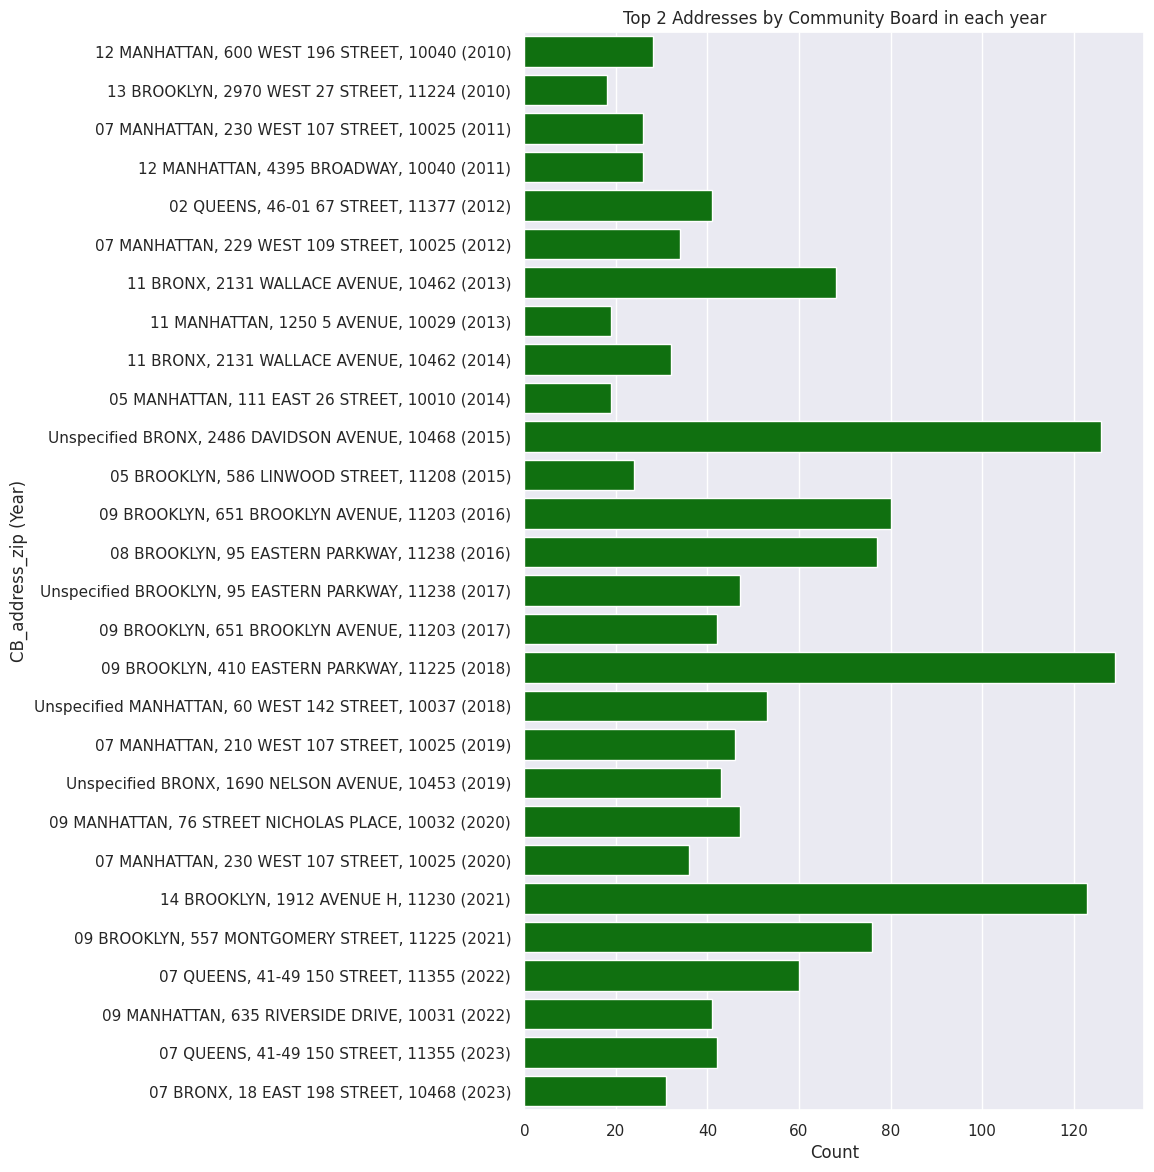

In [82]:
# Plot the counts of the top addresses with green color bars
plt.figure(figsize=(8, 14))
sns.barplot(data=top_2_addresses, x='count_y', y='label', color='green')
plt.xlabel('Count')
plt.ylabel('CB_address_zip (Year)')
plt.title('Top 2 Addresses by Community Board in each year')
plt.xticks()
plt.show()

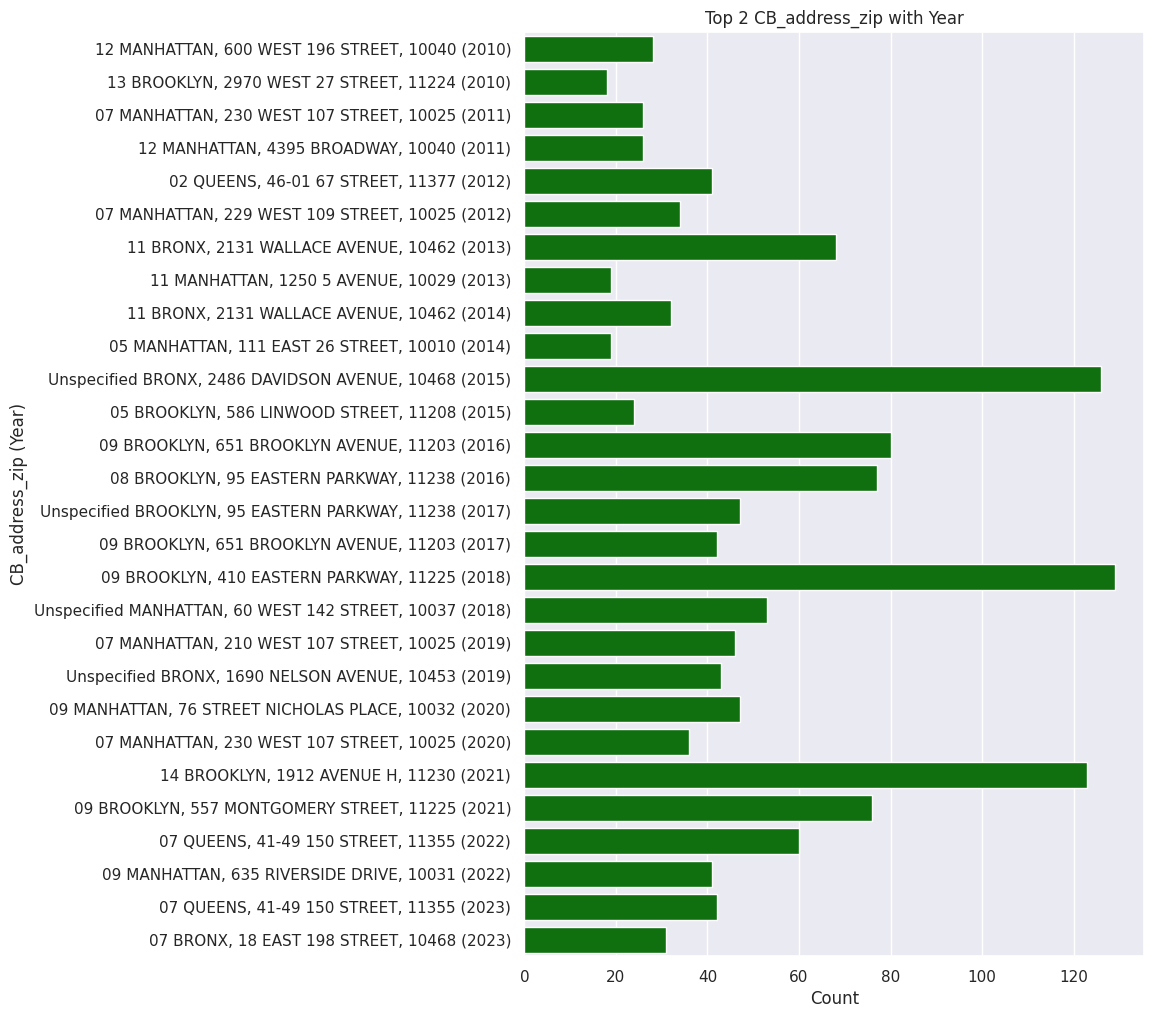

In [83]:
# Group the data by 'year' and 'CB_address_zip' and get the count
CB_year_counts = rat1.groupby(['year', 'CB_address_zip']).size().reset_index(name='count')

# Select the top addresses with the highest counts
top_addresses = CB_year_counts.groupby('year').apply(lambda x: x.nlargest(2, 'count')).reset_index(drop=True)

# Combine 'CB_address_zip' and 'year' into a new column
top_addresses['label'] = top_addresses['CB_address_zip'] + ' (' + top_addresses['year'].astype(str) + ')'

# Plot the counts of the top addresses with green color bars
plt.figure(figsize=(8, 12))
sns.barplot(data=top_addresses, x='count', y='label', color='green')
plt.xlabel('Count')
plt.ylabel('CB_address_zip (Year)')
plt.title('Top 2 CB_address_zip with Year')
plt.xticks()
plt.show()

####Top unique addresses using only incident_address

In [84]:
top_10_unique_addresses = rat1['incident_address'].value_counts().nlargest(10).index.tolist()
print(top_10_unique_addresses)

['2131 WALLACE AVENUE', '95 EASTERN PARKWAY', '651 BROOKLYN AVENUE', '410 EASTERN PARKWAY', '2486 DAVIDSON AVENUE', '1912 AVENUE H', 'BROADWAY', '41-49 150 STREET', '557 MONTGOMERY STREET', '60 WEST 142 STREET']


#####Attempt this on the sets... or limit by year and community board?

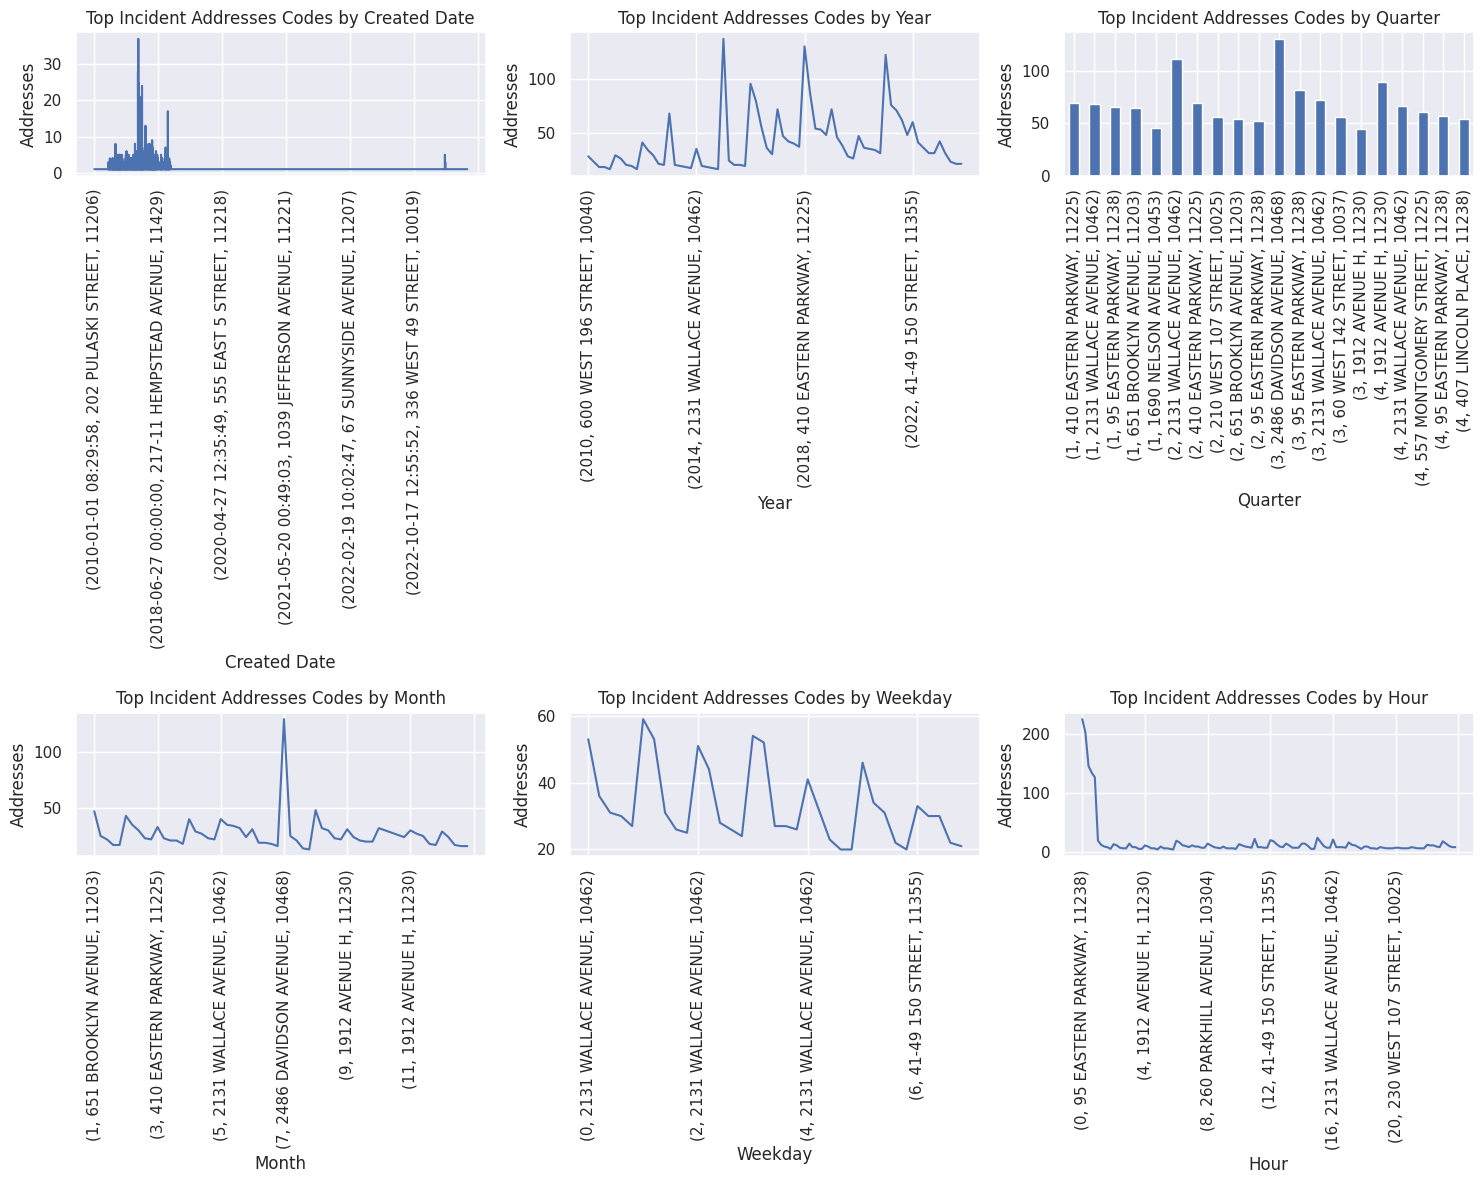

In [85]:
# Set the figure size
plt.figure(figsize=(15, 12))

# Plot the top_addresses_by_created_date
plt.subplot(2, 3, 1)
top_addresses_by_created_date.plot(kind='line')
plt.xlabel('Created Date')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Created Date')
plt.xticks(rotation=90)
# Plot the top_addresses_by_year
plt.subplot(2, 3, 2)
top_addresses_by_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Year')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by quarter
plt.subplot(2, 3, 3)
top_addresses_by_quarter.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Quarter')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by month
plt.subplot(2, 3, 4)
top_addresses_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Month')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by weekday
plt.subplot(2, 3, 5)
top_addresses_by_weekday.plot(kind='line')
plt.xlabel('Weekday')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Weekday')
plt.xticks(rotation=90)
# Plot the Top Incident Addresses codes by hour
plt.subplot(2, 3, 6)
top_addresses_by_hour.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('Addresses')
plt.title('Top Incident Addresses Codes by Hour')
plt.xticks(rotation=90)


# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

 ##rat2 New DF ✅ I maybe over doing it but this is for my reference

In [86]:
# Define the number of largest values to consider
n_largest = 3

# Group the data by 'year' and 'location_type'
year_location_type_grouped_data = rat1.groupby(['year', 'location_type'])

# Sort the groups based on 'location_type' in descending order
year_location_type_grouped_data = sorted(year_location_type_grouped_data, key=lambda x: x[0][1], reverse=True)

# Define an empty dataframe to store the calculated results
calculated_data = pd.DataFrame(columns=['year', 'location_type', 'sum_sightings_count', 'average_sightings_per_capita',
                                        'average_duration', 'average_frequency_cb', 'create_dates_min', 'create_dates_max',
                                        'close_dates_min', 'close_dates_max'])

for year_location_type_group, group_data in year_location_type_grouped_data:
    # Calculate sum, average, and min-max for specific columns
    sum_sightings_count = group_data['sightings_count'].sum()
    average_sightings_per_capita = group_data['sightings_per_capita'].mean()
    average_duration = group_data['duration'].mean()
    average_frequency_cb = group_data['frequency_cb'].mean()
    create_dates_min = group_data['create_date'].min()
    create_dates_max = group_data['create_date'].max()
    close_dates_min = group_data['closed_date'].min()
    close_dates_max = group_data['closed_date'].max()

    # Create a new row with the calculated values
    new_row = {'year': year_location_type_group[0],
               'location_type': year_location_type_group[1],
               'sum_sightings_count': sum_sightings_count,
               'average_sightings_per_capita': average_sightings_per_capita,
               'average_duration': average_duration,
               'average_frequency_cb': average_frequency_cb,
               'create_dates_min': create_dates_min,
               'create_dates_max': create_dates_max,
               'close_dates_min': close_dates_min,
               'close_dates_max': close_dates_max}

    # Append the new row to the calculated_data dataframe
    calculated_data = calculated_data.append(new_row, ignore_index=True)

# Merge the calculated_data dataframe with the rat2 dataframe based on 'year' and 'location_type'
rat2 = pd.merge(rat2, calculated_data, on=['year', 'location_type'], how='left')


<ipython-input-86-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-86-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-86-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-86-b20f5d9e640b>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  calculated_data = calculated_data.append(new_row, ignore_index=True)
<ipython-input-86-b20f5d9e640b>:39: Futu

In [87]:
rat2

,unique_key,created_date,due_date,closed_date,location_type,borough,incident_zip,community_board,city,incident_address,...,duration,frequency_cb,sum_sightings_count,average_sightings_per_capita,average_duration,average_frequency_cb,create_dates_min,create_dates_max,close_dates_min,close_dates_max
0,15633054,2010-01-01 11:20:45,01/31/2010 11:20:45 AM,NaT,1-2 Family Dwelling,QUEENS,11365,07 QUEENS,FRESH MEADOWS,59-13 159 STREET,...,0,1,2070,0.000020,7.430918,2.384541,2010-01-01,2010-12-31,2010-07-06 00:00:00,2011-09-15 00:00:00
1,15634275,2010-01-01 23:46:51,01/31/2010 11:46:51 PM,NaT,Commercial Building,BROOKLYN,11201,02 BROOKLYN,BROOKLYN,532 FULTON STREET,...,0,1,337,0.000024,11.759644,2.685460,2010-01-01,2010-12-31,2010-07-08 00:00:00,2011-05-09 00:00:00
2,15633896,2010-01-01 12:11:51,01/31/2010 12:11:51 PM,NaT,3+ Family Apt. Building,MANHATTAN,10027,10 MANHATTAN,NEW YORK CITY,317 WEST 120 STREET,...,0,2,3621,0.000018,11.718862,6.507595,2010-01-01,2010-12-31,2010-07-01 00:00:00,2012-01-18 00:00:00
3,15633897,2010-01-01 12:12:04,01/31/2010 12:12:04 PM,NaT,3+ Family Apt. Building,BRONX,10458,06 BRONX,BRONX,2356 LORILLARD PLACE,...,0,3,3621,0.000018,11.718862,6.507595,2010-01-01,2010-12-31,2010-07-01 00:00:00,2012-01-18 00:00:00
4,15633828,2010-01-01 14:15:27,01/31/2010 02:15:27 PM,NaT,Vacant Building,BROOKLYN,11218,12 BROOKLYN,BROOKLYN,900 CONEY ISLAND AVENUE,...,0,2,204,0.000019,8.946078,3.200980,2010-01-01,2010-12-20,2010-07-02 00:00:00,2011-09-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,55348031,2022-09-09 21:38:01,NaN,2022-09-09 21:38:01,Commercial Building,MANHATTAN,10012,02 MANHATTAN,NEW YORK CITY,54 MACDOUGAL STREET,...,0,15,1605,0.000022,2.636760,8.034268,2022-01-02,2022-12-31,2022-01-02 14:13:36,2023-02-10 14:28:41
210116,55351913,2022-09-09 21:39:20,NaN,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10026,10 MANHATTAN,NEW YORK CITY,312 MANHATTAN AVENUE,...,0,5,11382,0.000018,2.220436,8.962045,2022-01-01,2022-12-31,2022-01-01 00:03:04,2023-03-16 16:38:53
210117,55348032,2022-09-09 09:45:11,NaN,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,10019,04 MANHATTAN,NEW YORK CITY,725 TENTH AVENUE,...,0,1,312,0.000019,2.137821,4.057692,2022-01-05,2022-12-31,2022-01-05 00:04:26,2023-02-10 14:32:47
210118,55346704,2022-09-09 09:50:04,NaN,2022-09-09 09:50:04,Commercial Building,MANHATTAN,10009,03 MANHATTAN,NEW YORK CITY,93 1/2 EAST 7 STREET,...,0,7,1605,0.000022,2.636760,8.034268,2022-01-02,2022-12-31,2022-01-02 14:13:36,2023-02-10 14:28:41


#rat2_analysis DF includes outliers

In [88]:
rat2_analysis = rat1.copy()

#Top value counts by address zip :  Rat2_analysis

In [89]:
top_counts = rat2_analysis.groupby('address_zip').agg({
    'unique_key':'count',
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
})

top_counts_df = top_counts.reset_index().sort_values(['sightings_per_capita', 'unique_key'], ascending=[False, False])

# Filter the DataFrame based on the 'unique_key' column
top_counts_df = top_counts_df[top_counts_df['unique_key'] == 16]

print(top_counts_df)

                      address_zip  unique_key  sightings_per_capita  \
65541   45 WEST 132 STREET, 10037          16              0.000047   
31009  200 WEST 148 STREET, 10039          16              0.000036   
43023        2588 7 AVENUE, 10039          16              0.000036   
1144   101 WEST 143 STREET, 10030          16              0.000033   
5769   111 WEST 141 STREET, 10030          16              0.000033   
...                           ...         ...                   ...   
88712  83 EAST 18TH STREET, 11226          16              0.000010   
94098  95 LINDEN BOULEVARD, 11226          16              0.000010   
24004      17 DEVOE STREET, 11211          16              0.000010   
84223   728 LORIMER STREET, 11211          16              0.000010   
56497  3530 DECATUR AVENUE, 10467          16              0.000010   

                 location_type  \
65541  3+ Family Apt. Building   
31009  3+ Family Apt. Building   
43023  3+ Family Apt. Building   
1144   3+ F

In [90]:
sightings_per_count = rat2_analysis.groupby('address_zip').agg({
    'unique_key':'count',
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
}).nlargest(100, 'unique_key', keep='first')

top_counts_df = top_counts.reset_index().sort_values('sightings_per_capita', ascending=False)
print(top_counts_df)

                         address_zip  unique_key  sightings_per_capita  \
76134         60 BROAD STREET, 10004           1               0.00033   
53051        33 BEAVER STREET, 10004           1               0.00033   
39604        24 BEAVER STREET, 10004           1               0.00033   
2328         104 BROAD STREET, 10004           1               0.00033   
65395         45 BROAD STREET, 10004           1               0.00033   
...                              ...         ...                   ...   
98163        WALLABOUT STREET, 11249           1                   NaN   
98427                 WEST DRIVE, 83           1                   NaN   
98454  WILLIAMBRG STREET EAST, 11249           1                   NaN   
98457     WILLIAMSBURG BRIDGE, 11249           1                   NaN   
98491            WYTHE AVENUE, 11249           3                   NaN   

               location_type  \
76134    Commercial Building   
53051  Other (Explain Below)   
39604    Commer

In [91]:
count_16_df = top_counts_df[top_counts_df['unique_key'] == 16]
unique_address_zips = count_16_df['address_zip'].unique()
print(unique_address_zips)

['45 WEST 132 STREET, 10037' '200 WEST 148 STREET, 10039'
 '2588 7 AVENUE, 10039' '111 WEST 141 STREET, 10030'
 '101 WEST 143 STREET, 10030' '202 EAST 21 STREET, 10010'
 '149 EAST 118 STREET, 10035' '2 EAST 125 STREET, 10035'
 '151 MCGUINNESS BOULEVARD, 11222' 'NASSAU AVENUE, 11222'
 '20-54 45 STREET, 11105' '444 EAST 136 STREET, 10454'
 '386 EAST 139 STREET, 10454' '143 WEST 111 STREET, 10026'
 '321 WEST 116 STREET, 10026' '66 WEST 119 STREET, 10026'
 '86-34 WOODHAVEN BOULEVARD, 11421' '270 NAGLE AVENUE, 10034'
 '541 WEST 204TH STREET, 10034' '145 WEST 55 STREET, 10019'
 '34 HILLSIDE AVENUE, 10040' '444 EAST 82 STREET, 10028'
 '320 EAST 85 STREET, 10028' 'EAST 82 STREET, 10028'
 '1584 2 AVENUE, 10028' '222 EAST 81 STREET, 10028'
 '941 INTERVALE AVENUE, 10459' '338 STARR STREET, 11237'
 '30 IRVING AVENUE, 11237' '296 HARMAN STREET, 11237'
 '73 EASTERN PARKWAY, 11238' '127 LEFFERTS PLACE, 11238'
 '347 LINCOLN PLACE, 11238' '251 CLIFTON PLACE, 11216'
 '792 STERLING PLACE, 11216' '267 CLI

In [92]:
sightings_per_capita = rat2_analysis.groupby('address_zip').agg({
    'sightings_per_capita': 'mean',
    'location_type': 'first',
    'created_date': lambda x: list(x),
    'city': 'first',
    'community_board': 'first',
    'the_geom': 'first',
    'duration': 'mean'
})

sightings_per_capita['unique_key_count'] = rat2_analysis.groupby('address_zip')['unique_key'].count()
sightings_per_capita_df = sightings_per_capita.reset_index().sort_values('sightings_per_capita', ascending=False)
print(sightings_per_capita_df)

                         address_zip  sightings_per_capita  \
76134         60 BROAD STREET, 10004               0.00033   
53051        33 BEAVER STREET, 10004               0.00033   
39604        24 BEAVER STREET, 10004               0.00033   
2328         104 BROAD STREET, 10004               0.00033   
65395         45 BROAD STREET, 10004               0.00033   
...                              ...                   ...   
98163        WALLABOUT STREET, 11249                   NaN   
98427                 WEST DRIVE, 83                   NaN   
98454  WILLIAMBRG STREET EAST, 11249                   NaN   
98457     WILLIAMSBURG BRIDGE, 11249                   NaN   
98491            WYTHE AVENUE, 11249                   NaN   

               location_type  \
76134    Commercial Building   
53051  Other (Explain Below)   
39604    Commercial Building   
2328     Commercial Building   
65395             Vacant Lot   
...                      ...   
98163  Other (Explain Below)   

In [93]:
sightings_per_capita_df.unique_key_count.unique()

array([  1,   3,   2,   4,   9,   7,   6,   5,  10,  15,   8,  11,  21,
        25,  12,  35,  19,  20,  47,  36,  13,  16,  33,  23,  17, 117,
        14,  24,  30,  18,  39,  26,  40,  42,  32,  34,  28,  37,  22,
        43,  29,  38,  31,  60,  44,  41,  81,  85,  27,  46,  65,  61,
        75,  51,  67,  50, 256, 114, 150,  59,  54,  80,  83,  77,  45,
        73,  98, 177,  76, 317, 138,  56,  49,  78, 120,  53,  57, 137,
       110,  52,  89,  99,  84])

this needs fixed

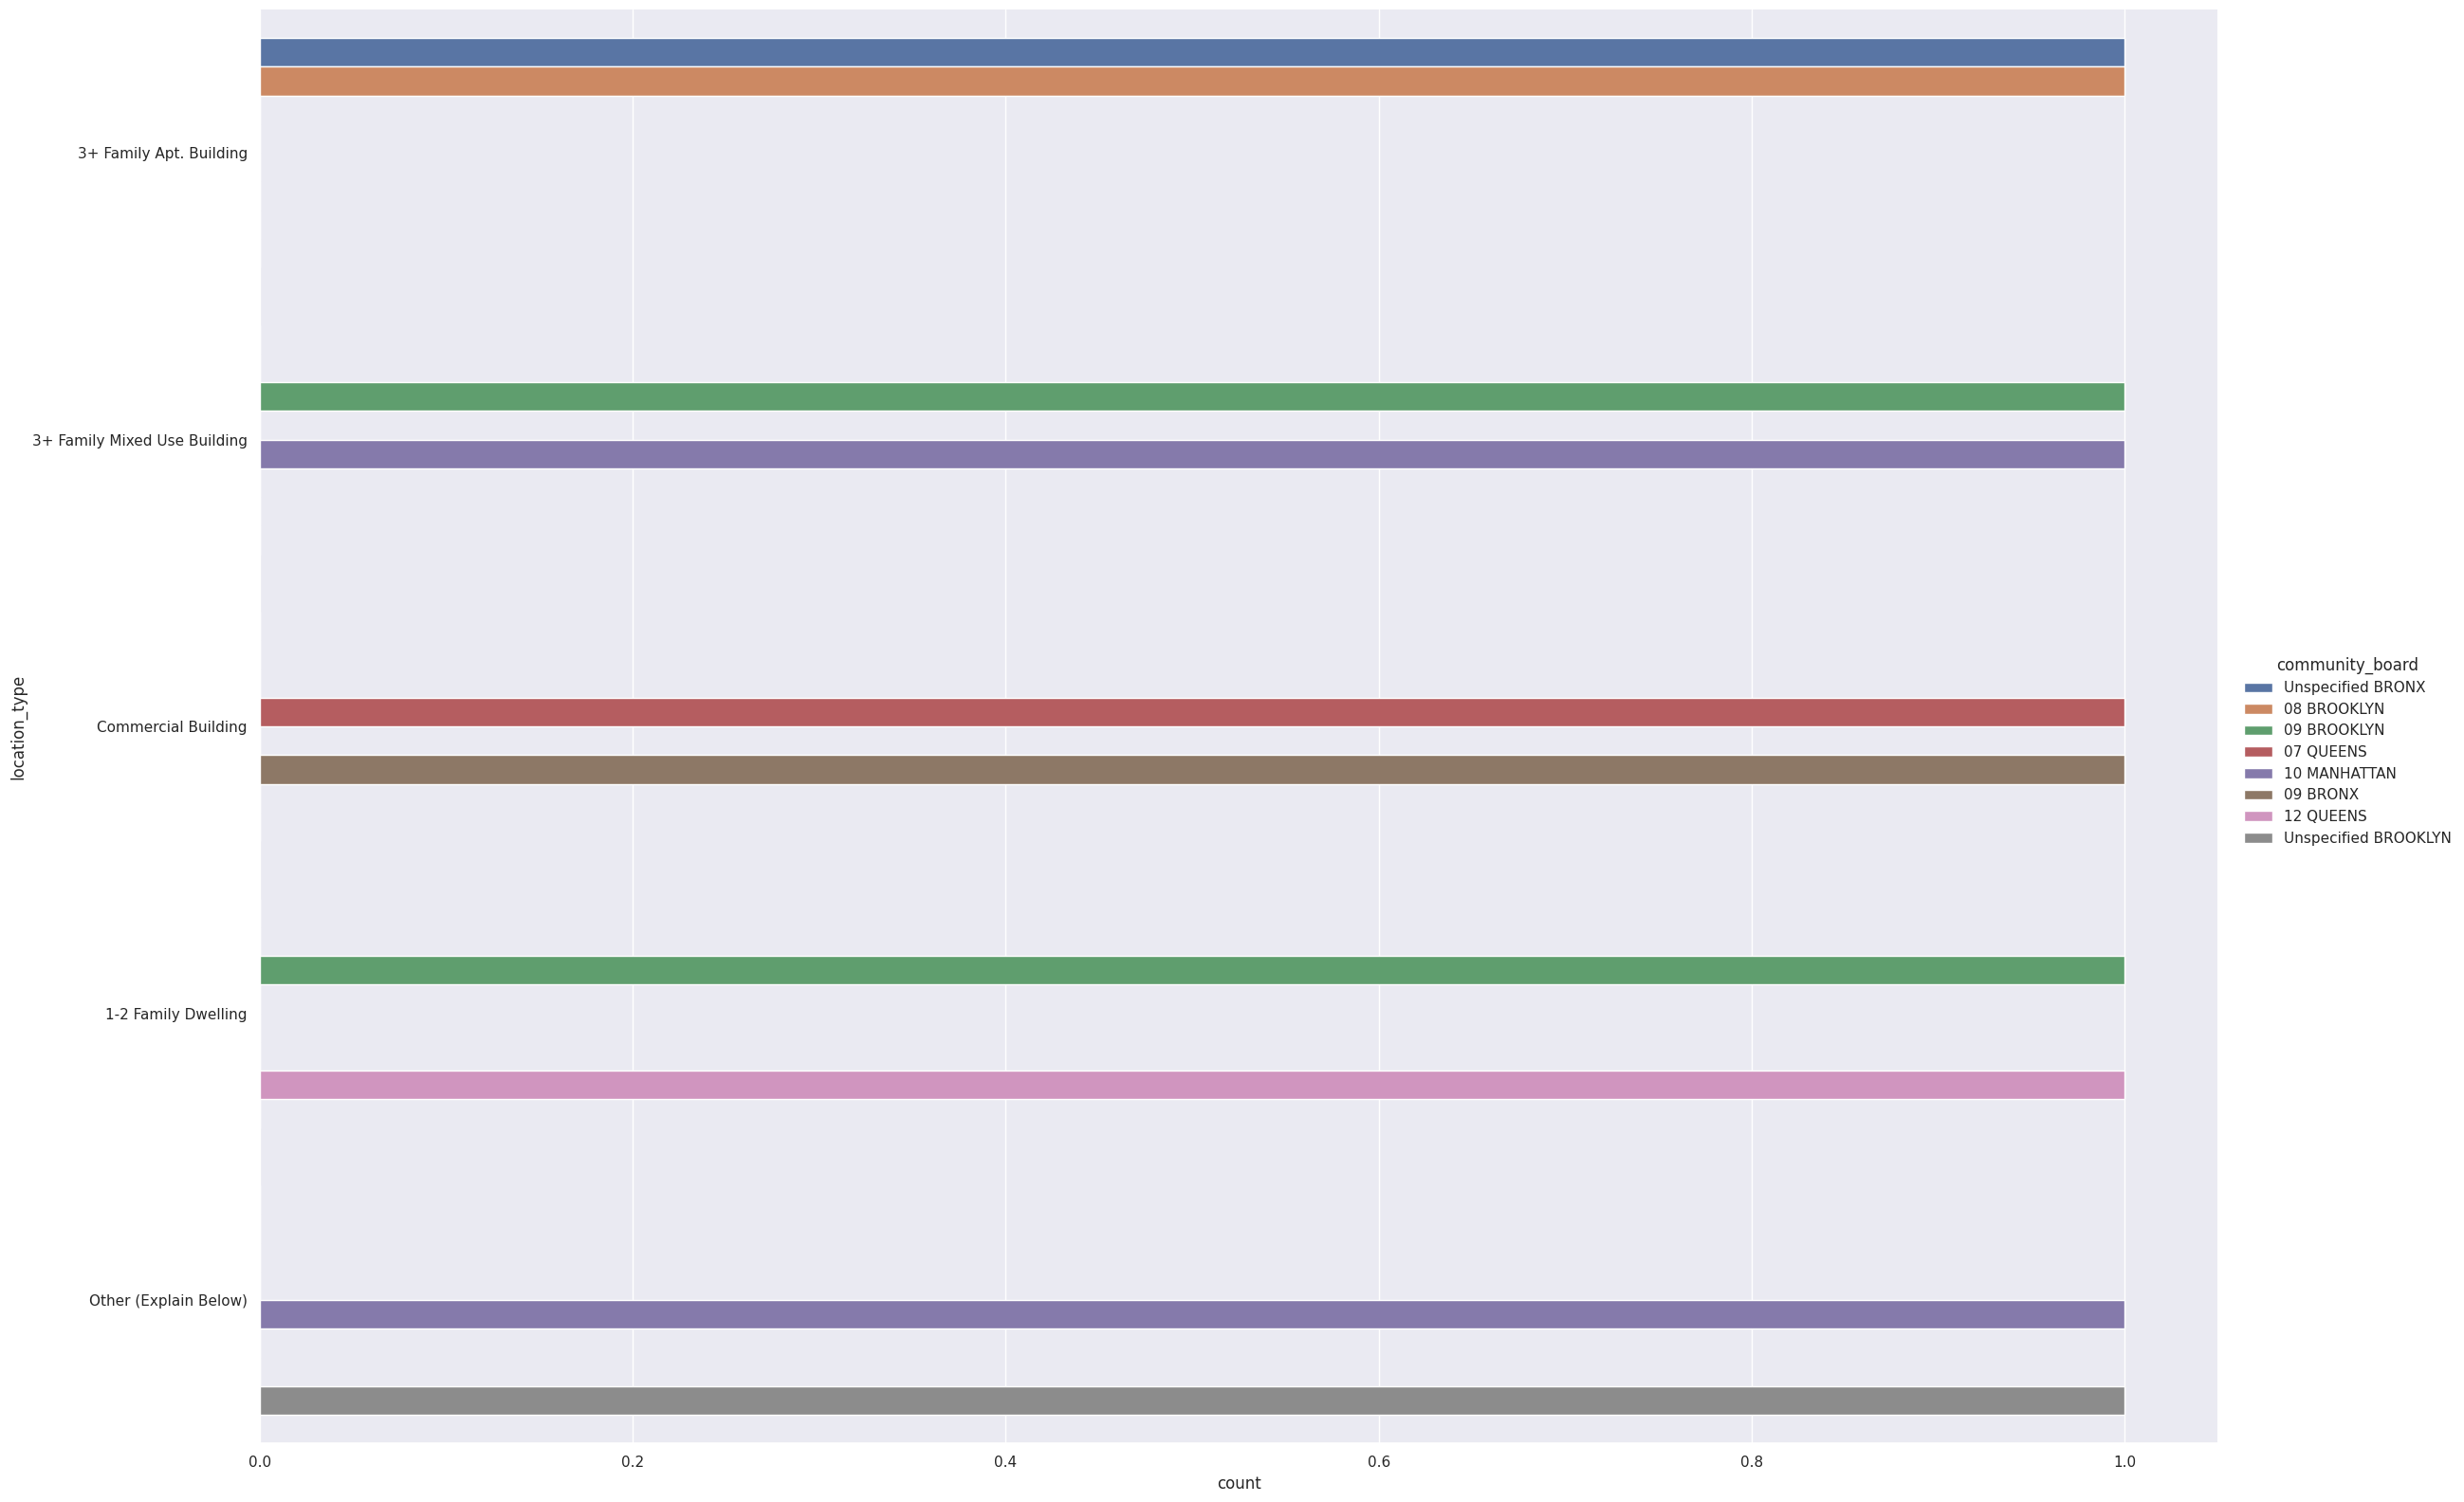

In [94]:
# Calculate the accumulated count per location type
accumulated_count = sightings_per_capita_df.groupby('location_type')['unique_key_count'].sum().reset_index()
top_5_location_types = accumulated_count.nlargest(5, 'unique_key_count')['location_type']

# Filter the data for the top 5 location types
top_5_per_category = (
    sightings_per_capita_df[sightings_per_capita_df['location_type'].isin(top_5_location_types)]
    .groupby('location_type')
    .apply(lambda x: x.nlargest(2, 'unique_key_count'))
    .reset_index(drop=True)
)

# Sort the location types in descending order based on the accumulated count
top_5_per_category = top_5_per_category.sort_values('unique_key_count', ascending=False)

# Plot the filtered data
sns.catplot(y='location_type', hue='community_board', data=top_5_per_category, kind='count', height=16, aspect=1.5)

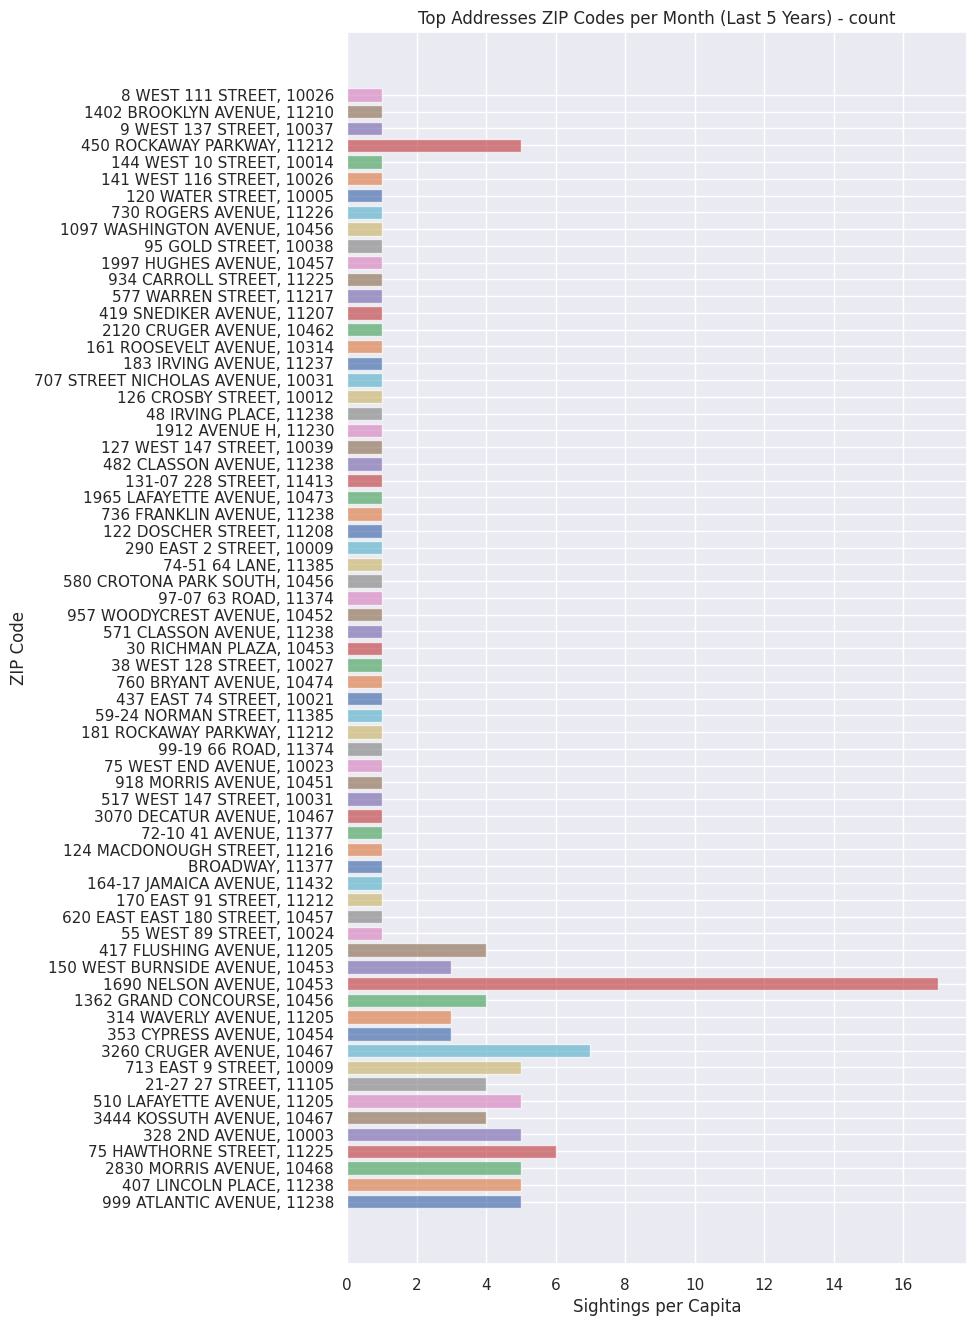

In [95]:
# Convert the series to a DataFrame
count_top_addresses = pd.DataFrame(top_addresses_by_created_date)

# Reset the index of the DataFrame
count_top_addresses.reset_index(inplace=True)

# Rename the columns
count_top_addresses.columns = ['created_date', 'address_zip', 'count']

# Convert the 'created_date' column to a period type representing month and year
count_top_addresses['created_date'] = pd.to_datetime(count_top_addresses['created_date'])
count_top_addresses['month_year'] = count_top_addresses['created_date'].dt.to_period('M')

# Filter the data for the last 5 years
current_year = pd.to_datetime('today').year
five_years_ago = current_year - 5
count_top_addresses = count_top_addresses[count_top_addresses['created_date'].dt.year >= five_years_ago]

# Get the top 3 ZIP codes per month
top_3_per_month = count_top_addresses.groupby('month_year').apply(lambda x: x.nlargest(1, 'count')).reset_index(drop=True)

# Create a figure and axes with a wider plot
fig, ax = plt.subplots(figsize=(8, 16))

# Plot the data
top_3_per_month.groupby('month_year').apply(lambda x: plt.barh(x['address_zip'], x['count'], alpha=0.7))

# Set the labels and title
ax.set_xlabel('Sightings per Capita')
ax.set_ylabel('ZIP Code')
ax.set_title('Top Addresses ZIP Codes per Month (Last 5 Years) - count')

# Rotate the x-axis labels for better readability (optional)
plt.xticks()

# Display the plot
plt.show()

In [96]:
# sns.barplot(x='address_zip', y='sightings_per_capita', hue='community_board', data=top_100_address_counts_df)
# plt.xlabel('address_zip')
# plt.ylabel('sightings_per_capita')
# plt.title('Comparison of Counts')
# plt.xticks(rotation=90)
# plt.show()

#rat1_analysis: NEW df with no no nulls/ for value counts to scale and analyse/

In [97]:
# Create a new DataFrame for rat1 analysis
rat1_analysis = rat1.copy()

In [98]:
# Drop the specified columns
columns_to_drop = ['incident_address','incident_zip', 'incident_zips','cross_street _1', 'cross_street_2','closed_date','due_date', 'intersection_street_1', 'intersection_street_2', 'address_Type', 'landmark', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'latitude', 'longitude', 'location','table_count', 'modztca', 'label', 'zcta', 'pop_est', 'create_date', 'close_date']
rat1_analysis = rat1_analysis.drop(columns_to_drop, axis=1).reset_index(drop=True)

In [99]:
rat1_analysis

,unique_key,created_date,location_type,borough,community_board,city,street_name,status,the_geom,address_zip,...,month,weekday,day,hour,sightings_count,sightings_per_capita,duration,frequency_cb,CB_address_zip,CB_counts
0,15633054,2010-01-01 11:20:45,1-2 Family Dwelling,QUEENS,07 QUEENS,FRESH MEADOWS,159 STREET,Pending,MULTIPOLYGON (((-73.81088698294997 40.72717335...,"59-13 159 STREET, 11365",...,1,4,1,11,1,0.000022,0,1,"07 QUEENS, 59-13 159 STREET, 11365",1.0
1,15634275,2010-01-01 23:46:51,Commercial Building,BROOKLYN,02 BROOKLYN,BROOKLYN,FULTON STREET,Pending,MULTIPOLYGON (((-73.98999099359916 40.68331867...,"532 FULTON STREET, 11201",...,1,4,1,23,1,0.000016,0,1,"02 BROOKLYN, 532 FULTON STREET, 11201",1.0
2,15633896,2010-01-01 12:11:51,3+ Family Apt. Building,MANHATTAN,10 MANHATTAN,NEW YORK CITY,WEST 120 STREET,Pending,MULTIPOLYGON (((-73.96581272236776 40.80884237...,"317 WEST 120 STREET, 10027",...,1,4,1,12,1,0.000015,0,2,"10 MANHATTAN, 317 WEST 120 STREET, 10027",1.0
3,15633897,2010-01-01 12:12:04,3+ Family Apt. Building,BRONX,06 BRONX,BRONX,LORILLARD PLACE,Pending,MULTIPOLYGON (((-73.8999587931763 40.857423896...,"2356 LORILLARD PLACE, 10458",...,1,4,1,12,1,0.000012,0,3,"06 BRONX, 2356 LORILLARD PLACE, 10458",1.0
4,15633828,2010-01-01 14:15:27,Vacant Building,BROOKLYN,12 BROOKLYN,BROOKLYN,CONEY ISLAND AVENUE,Pending,MULTIPOLYGON (((-73.97716602560648 40.63074880...,"900 CONEY ISLAND AVENUE, 11218",...,1,4,1,14,1,0.000013,0,2,"12 BROOKLYN, 900 CONEY ISLAND AVENUE, 11218",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210115,55348031,2022-09-09 21:38:01,Commercial Building,MANHATTAN,02 MANHATTAN,NEW YORK CITY,MACDOUGAL STREET,Closed,MULTIPOLYGON (((-74.00408405811187 40.72537431...,"54 MACDOUGAL STREET, 10012",...,9,4,9,21,1,0.000043,0,15,"02 MANHATTAN, 54 MACDOUGAL STREET, 10012",1.0
210116,55351913,2022-09-09 21:39:20,3+ Family Apt. Building,MANHATTAN,10 MANHATTAN,NEW YORK CITY,MANHATTAN AVENUE,Closed,MULTIPOLYGON (((-73.96200720826798 40.80550908...,"312 MANHATTAN AVENUE, 10026",...,9,4,9,21,1,0.000025,0,5,"10 MANHATTAN, 312 MANHATTAN AVENUE, 10026",1.0
210117,55348032,2022-09-09 09:45:11,Parking Lot/Garage,MANHATTAN,04 MANHATTAN,NEW YORK CITY,TENTH AVENUE,Closed,MULTIPOLYGON (((-74.00114791977168 40.76202777...,"725 TENTH AVENUE, 10019",...,9,4,9,9,1,0.000023,0,1,"04 MANHATTAN, 725 TENTH AVENUE, 10019",1.0
210118,55346704,2022-09-09 09:50:04,Commercial Building,MANHATTAN,03 MANHATTAN,NEW YORK CITY,EAST 7 STREET,Closed,MULTIPOLYGON (((-73.98863576728334 40.72293099...,"93 1/2 EAST 7 STREET, 10009",...,9,4,9,9,1,0.000017,0,7,"03 MANHATTAN, 93 1/2 EAST 7 STREET, 10009",1.0


##rat1_analysis DF without outliers  for ml

In [100]:
Q1 = rat1_analysis['frequency_cb'].quantile(0.25)
Q3 = rat1_analysis['frequency_cb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rat1_analysis[(rat1_analysis['frequency_cb'] < lower_bound) | (rat1_analysis['frequency_cb'] > upper_bound)]

In [101]:
rat1_analysis = rat1_analysis[~((rat1_analysis['frequency_cb'] < lower_bound) | (rat1_analysis['frequency_cb'] > upper_bound))]

In [102]:
rat1_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188681 entries, 0 to 210119
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   unique_key            188681 non-null  int64         
 1   created_date          188681 non-null  datetime64[ns]
 2   location_type         188671 non-null  object        
 3   borough               188679 non-null  object        
 4   community_board       188679 non-null  object        
 5   city                  186063 non-null  object        
 6   street_name           188680 non-null  object        
 7   status                188681 non-null  object        
 8   the_geom              187674 non-null  object        
 9   address_zip           188681 non-null  object        
 10  year                  188681 non-null  int64         
 11  quarter               188681 non-null  int64         
 12  month                 188681 non-null  int64         
 13 

In [103]:
# sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [104]:
missing_counts =   rat1_analysis.isnull().sum().sort_values(ascending = False)
percent = ( rat1_analysis.isnull().sum()*100/  rat1_analysis.shape[0]).sort_values(ascending = False)

In [105]:
missing_rat1 = pd.concat([missing_counts, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat1}')

 Missing values: 
                      Counts         %
city                    2618  1.387527
the_geom                1007  0.533705
sightings_per_capita    1007  0.533705
location_type             10  0.005300
CB_counts                  2  0.001060
borough                    2  0.001060
community_board            2  0.001060
CB_address_zip             2  0.001060
street_name                1  0.000530
day                        0  0.000000
frequency_cb               0  0.000000
duration                   0  0.000000
sightings_count            0  0.000000
hour                       0  0.000000
unique_key                 0  0.000000
weekday                    0  0.000000
month                      0  0.000000
created_date               0  0.000000
year                       0  0.000000
address_zip                0  0.000000
status                     0  0.000000
quarter                    0  0.000000


In [106]:
rat1_analysis.columns

Index(['unique_key', 'created_date', 'location_type', 'borough',
       'community_board', 'city', 'street_name', 'status', 'the_geom',
       'address_zip', 'year', 'quarter', 'month', 'weekday', 'day', 'hour',
       'sightings_count', 'sightings_per_capita', 'duration', 'frequency_cb',
       'CB_address_zip', 'CB_counts'],
      dtype='object')

In [107]:
# Reset the index and sort by 'unique_key' and 'created_date' in ascending order
rat1_analysis_sorted = rat1_analysis.sort_values(by=['created_date','unique_key'], ascending=True).reset_index(drop=True)

# Display the sorted DataFrame
print(rat1_analysis_sorted)

        unique_key        created_date            location_type    borough  \
0         15633803 2010-01-01 08:29:58  3+ Family Apt. Building   BROOKLYN   
1         15633054 2010-01-01 11:20:45      1-2 Family Dwelling     QUEENS   
2         15633896 2010-01-01 12:11:51  3+ Family Apt. Building  MANHATTAN   
3         15633897 2010-01-01 12:12:04  3+ Family Apt. Building      BRONX   
4         15633828 2010-01-01 14:15:27          Vacant Building   BROOKLYN   
...            ...                 ...                      ...        ...   
188676    58072108 2023-07-02 23:04:44        Construction Site   BROOKLYN   
188677    58077231 2023-07-02 23:27:12  3+ Family Apt. Building     QUEENS   
188678    58078235 2023-07-03 00:19:54  3+ Family Apt. Building  MANHATTAN   
188679    58075206 2023-07-03 01:08:50    Other (Explain Below)  MANHATTAN   
188680    58072023 2023-07-03 02:05:32    Other (Explain Below)  MANHATTAN   

              community_board           city          street_na

In [108]:
rat1_analysis = rat1_analysis_sorted.reset_index(drop=True)

In [109]:
missing_counts_ck =   rat1_analysis.isnull().sum().sort_values(ascending = False)
percent_ck = ( rat1_analysis.isnull().sum()*100/  rat1_analysis.shape[0]).sort_values(ascending = False)

In [110]:
missing_rat = pd.concat([missing_counts_ck, percent], axis = 1, keys = ['Counts', '%'])
print(f' Missing values: \n{missing_rat}')

 Missing values: 
                      Counts         %
city                    2618  1.387527
the_geom                1007  0.533705
sightings_per_capita    1007  0.533705
location_type             10  0.005300
CB_counts                  2  0.001060
borough                    2  0.001060
community_board            2  0.001060
CB_address_zip             2  0.001060
street_name                1  0.000530
day                        0  0.000000
frequency_cb               0  0.000000
duration                   0  0.000000
sightings_count            0  0.000000
hour                       0  0.000000
unique_key                 0  0.000000
weekday                    0  0.000000
month                      0  0.000000
created_date               0  0.000000
year                       0  0.000000
address_zip                0  0.000000
status                     0  0.000000
quarter                    0  0.000000


In [111]:
rat1_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188681 entries, 0 to 188680
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   unique_key            188681 non-null  int64         
 1   created_date          188681 non-null  datetime64[ns]
 2   location_type         188671 non-null  object        
 3   borough               188679 non-null  object        
 4   community_board       188679 non-null  object        
 5   city                  186063 non-null  object        
 6   street_name           188680 non-null  object        
 7   status                188681 non-null  object        
 8   the_geom              187674 non-null  object        
 9   address_zip           188681 non-null  object        
 10  year                  188681 non-null  int64         
 11  quarter               188681 non-null  int64         
 12  month                 188681 non-null  int64         
 13 

In [112]:
# sns.heatmap(rat1_analysis.isnull(), cbar=False)

In [113]:
rat1_analysis['city'] = rat1_analysis['city'].fillna('UNSPECIFIED')

In [114]:
rat1_analysis.columns

Index(['unique_key', 'created_date', 'location_type', 'borough',
       'community_board', 'city', 'street_name', 'status', 'the_geom',
       'address_zip', 'year', 'quarter', 'month', 'weekday', 'day', 'hour',
       'sightings_count', 'sightings_per_capita', 'duration', 'frequency_cb',
       'CB_address_zip', 'CB_counts'],
      dtype='object')

In [115]:
# Group the 'rat1' dataframe by 'address_zip' and count the occurrences
top_address_counts = rat1.groupby('address_zip').size().reset_index(name='counts')

# Sort the dataframe by 'counts' in descending order
top_address_counts = top_address_counts.sort_values('counts', ascending=False)

# Join the 'rat1' dataframe with the 'top_address_counts' dataframe
top_address_counts = top_address_counts.merge(rat1, on='address_zip')

# Reset the index of the dataframe
top_address_counts = top_address_counts.reset_index(drop=True)

# Print the 'top_address_counts' dataframe
print(top_address_counts)


                          address_zip  counts  unique_key        created_date  \
0          2131 WALLACE AVENUE, 10462     317    27129307 2014-01-12 00:00:00   
1          2131 WALLACE AVENUE, 10462     317    32399557 2016-01-12 00:00:00   
2          2131 WALLACE AVENUE, 10462     317    24776738 2013-01-13 00:00:00   
3          2131 WALLACE AVENUE, 10462     317    49551285 2021-01-13 11:01:52   
4          2131 WALLACE AVENUE, 10462     317    29725825 2015-01-15 00:00:00   
...                               ...     ...         ...                 ...   
210115       24 EAST 35 STREET, 10016       1    24507620 2012-12-01 00:00:00   
210116       24 EAST 14 STREET, 10003       1    57133958 2023-03-24 12:25:18   
210117       24 EAST 10 STREET, 10003       1    57810998 2023-06-05 10:36:54   
210118          24 DEAN STREET, 11201       1    39436510 2018-06-11 00:00:00   
210119  ZOO CENTER TRAIL SOUTH, 10460       1    33703539 2016-06-27 00:00:00   

                      due_d

In [116]:
# Filter the data for the last 3 years
current_year = pd.to_datetime('today').year
three_years_ago = current_year - 3
filtered_data = top_address_counts[top_address_counts['created_date'].dt.year >= three_years_ago]

# Get the top 10 unique addresses
top_10_addresses = filtered_data['address_zip'].unique()[:10]

# Filter the dataframe for the top 10 addresses
top_10_data = filtered_data[filtered_data['address_zip'].isin(top_10_addresses)]

# Print the top 10 unique addresses for the last 3 years
print(top_10_data['address_zip'].unique())

['2131 WALLACE AVENUE, 10462' '95 EASTERN PARKWAY, 11238'
 '651 BROOKLYN AVENUE, 11203' '1912 AVENUE H, 11230'
 '41-49 150 STREET, 11355' '557 MONTGOMERY STREET, 11225'
 '60 WEST 142 STREET, 10037' '407 LINCOLN PLACE, 11238'
 '120 WEST 94 STREET, 10025' '230 WEST 107 STREET, 10025']


###StandardScalor

need to grab the dsny1 info and also drop columns befor scaling...normalization

In [117]:
# top_address_scale = .copy()

# # Select numeric columns for scaling
# numeric_columns = top_address_scale.select_dtypes(include=['int', 'float']).columns

# # Scale the numeric columns
# scaler = StandardScaler()
# top_address_scale[numeric_columns] = scaler.fit_transform(top_address_scale[numeric_columns])

# print(top_address_scale)

In [118]:
# top_address_scale

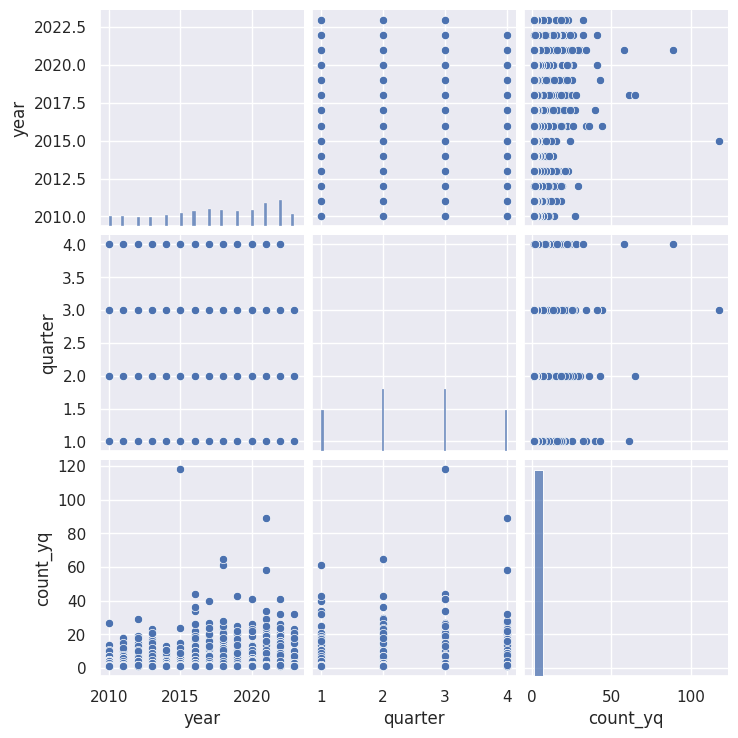

In [119]:
sns.pairplot(top_addresses_zip_yq_counts)

In [120]:
# # Calculate the correlation matrix
# correlation_matrix = top_address_scale.corr()

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 10})
# plt.title('Correlation Matrix')
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.show()

###MinMaxScaler

In [121]:
# top_address_scale2 = top_address_counts.copy()
# top_address_scale2 = top_address_scale2.fillna(top_address_scale2.mean())

# # Define data
# data = top_address_scale2

# # Define min-max scaler
# scaler2 = MinMaxScaler()

# # Transform data
# scaled_top_address2 = scaler2.fit_transform(data)

# print(scaled_top_address2)

In [122]:
# Compute the correlation matrix
# minmax_correlation_matrix = np.corrcoef(scaled_top_address2, rowvar=False)

# print(minmax_correlation_matrix)

In [123]:
# plt.figure(figsize=(14, 6))
# sns.heatmap(minmax_correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={'fontsize': 10})

# plt.title('Min Max - Correlation Matrix')
# plt.xticks(rotation=45)
# plt.show()

#rodents-dsny

In [136]:
rodents = top_address_counts.copy()

In [137]:
rodents.columns

Index(['address_zip', 'counts', 'unique_key', 'created_date', 'due_date',
       'closed_date', 'location_type', 'borough', 'incident_zip',
       'community_board', 'city', 'incident_address', 'street_name',
       'cross_street _1', 'cross_street_2', 'intersection_street_1',
       'intersection_street_2', 'address_Type', 'landmark', 'status',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)', 'latitude',
       'longitude', 'location', 'table_count', 'modztca', 'label', 'zcta',
       'pop_est', 'the_geom', 'incident_zips', 'year', 'quarter', 'month',
       'weekday', 'day', 'hour', 'sightings_count', 'sightings_per_capita',
       'create_date', 'close_date', 'duration', 'frequency_cb',
       'CB_address_zip', 'CB_counts'],
      dtype='object')

In [138]:
# List of redundant and unwanted columns
redundant_columns = [ 'counts', 'incident_zips', 'year', 'quarter', 'month','table_count',
        'day', 'hour', 'sightings_count', 'CB_counts', 'create_date', 'close_date']

# Remove redundant and unwanted columns
rodents = rodents.drop(columns=redundant_columns)

# Print the updated dataframe
print(rodents)

                          address_zip  unique_key        created_date  \
0          2131 WALLACE AVENUE, 10462    27129307 2014-01-12 00:00:00   
1          2131 WALLACE AVENUE, 10462    32399557 2016-01-12 00:00:00   
2          2131 WALLACE AVENUE, 10462    24776738 2013-01-13 00:00:00   
3          2131 WALLACE AVENUE, 10462    49551285 2021-01-13 11:01:52   
4          2131 WALLACE AVENUE, 10462    29725825 2015-01-15 00:00:00   
...                               ...         ...                 ...   
210115       24 EAST 35 STREET, 10016    24507620 2012-12-01 00:00:00   
210116       24 EAST 14 STREET, 10003    57133958 2023-03-24 12:25:18   
210117       24 EAST 10 STREET, 10003    57810998 2023-06-05 10:36:54   
210118          24 DEAN STREET, 11201    39436510 2018-06-11 00:00:00   
210119  ZOO CENTER TRAIL SOUTH, 10460    33703539 2016-06-27 00:00:00   

                      due_date         closed_date            location_type  \
0       02/11/2014 01:08:47 PM 2014-01-27 00

In [139]:
rodents.isnull().sum()

address_zip                        0
unique_key                         0
created_date                       0
due_date                       88995
closed_date                    16022
location_type                     12
borough                            2
incident_zip                       0
community_board                    2
city                            2997
incident_address                   0
street_name                        1
cross_street _1                18590
cross_street_2                 18587
intersection_street_1         117884
intersection_street_2         117848
address_Type                    4444
landmark                      126987
status                             0
X Coordinate (State Plane)      1537
Y Coordinate (State Plane)      1537
latitude                        1537
longitude                       1537
location                        1537
modztca                         1079
label                           1079
zcta                            1079
p

In [128]:
dsny1.columns

Index(['post_code', 'modzcta', 'label', 'zcta', 'district', 'districtcode',
       'section', 'community_board', 'council_district', 'schedulecode',
       'neighborhoods', 'nta', 'cb_office_address', 'pop_est', 'frequency',
       'bulk_day1', 'bulk_day2', 'bulk_day3', 'refuse_day1', 'refuse_day2',
       'refuse_day3', 'refuse_frequency', 'recycling_frequency',
       'organic_frequency', 'bulk_frequency', 'ObjectID', 'SHAPE_Area-1',
       'SHAPE_Length-1', 'Latitude', 'Longitude', 'Location Point',
       'multipolygon-1', 'census_tract', 'GlobalID', 'location'],
      dtype='object')

In [141]:
# Create a binary column in both dataframes
rodents['merge_column'] = 1
dsny1['merge_column'] = 1

rodent_analysis = rodents[['merge_column','modztca','created_date','address_zip',
                           'community_board', 'city','location_type','status',
                           'sightings_per_capita','duration', 'frequency_cb',
                           'CB_address_zip', 'pop_est']]

# Select relevant columns from the 'dsny1' dataframe
dsny_analysis = dsny1[['merge_column','modzcta', 'district',
                       'schedulecode', 'bulk_frequency','bulk_day1', 'bulk_day2',
                       'bulk_day3', 'refuse_frequency','refuse_day1', 'refuse_day2',
                       'refuse_day3', 'recycling_frequency','organic_frequency']]

rodent_analysis.reset_index(drop=True, inplace=True)
dsny_analysis.reset_index(drop=True, inplace=True)
#NEEDS TO BE SIMPLIFIED? AGGREGATED? WHAT TO DO?
# used  top_10_data for the rats_dsny_T10_3yrs output

#rodent_analysis.dropna(subset=['modztca'], inplace=True)
# combined_data = pd.merge(rodent_analysis, dsny_analysis, on=['merge_column'], how='left')

# # Perform correlation analysis on the combined data
# correlation_matrix = combined_data.corr()

# # Perform other advanced analytics on the combined data
# # ...# Remove the merge_column from the combined dataframe (if desired)
# combined_data.drop('merge_column', axis=1, inplace=True)# Select relevant columns from the 'rat1' dataframe

# # Display the correlation matrix
# print(correlation_matrix)

In [130]:
#rats_dsny_T10_3yrs = combined_data.copy()

# Exports

###Print to file

In [142]:
# TOP 10 rodents.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rodents.csv")
# rats_dsny_T10_3yrs.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rats_dsny_T10_3yrs.csv")
# for the full one rodents.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/lg_rodents.csv")

In [133]:
#df_top_addresses.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/df_top_addresses.csv")

In [135]:
#rat1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1.csv")
# dsny1.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/dsny1.csv")
#rat1_analysis.to_csv("/content/drive/MyDrive/Projects/rats_analysis_application/Datasources/outputs_pandas/rat1_analysis.csv")